# Preprocessing and EDA

## Data Cleaning, Filling Missing Values and Dropping Duplicates

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from folium import plugins
! pip install --upgrade mlxtend

warnings.filterwarnings("ignore")

     |████████████████████████████████| 1.3 MB 5.2 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
# upload zipped data into the main root of your gdrive and run the following once
!unzip '/content/drive/MyDrive/LAPD CRIME DATA.zip'



Mounted at /content/drive
Archive:  /content/drive/MyDrive/LAPD CRIME DATA.zip
  inflating: LAPD CRIME DATA/CRIME_DATA_2014_2017.csv  
 extracting: LAPD CRIME DATA/LAPD_Reporting_Districts.cpg  
  inflating: LAPD CRIME DATA/LAPD_Reporting_Districts.dbf  
  inflating: LAPD CRIME DATA/LAPD_Reporting_Districts.prj  
  inflating: LAPD CRIME DATA/LAPD_Reporting_Districts.shp  
  inflating: LAPD CRIME DATA/LAPD_Reporting_Districts.shx  
  inflating: LAPD CRIME DATA/MO_Codes.csv  


In [ ]:
mo_codes  = pd.read_csv('/content/LAPD CRIME DATA/MO_Codes.csv')
mo_codes_df = pd.DataFrame(mo_codes)


lapd_data  = pd.read_csv('/content/LAPD CRIME DATA/CRIME_DATA_2014_2017.csv')
lapd_data_df = pd.DataFrame(lapd_data)
# lapd_data_df['Victim Descent'].unique()



In [ ]:
lapd_data_df.columns
lapd_data_df.head()

Unnamed: 0  DR Number Date Reported Date Occurred  Time Occurred  Area ID  \
0      984316  142115409    09/12/2014    09/12/2014           1410       21   
1      984317  142115410    09/12/2014    09/12/2014            900       21   
2      984318  142115413    09/12/2014    09/12/2014           2230       21   
3      984319  142115415    09/12/2014    09/12/2014           2115       21   
4      984320  142115418    09/13/2014    09/12/2014           2145       21   

  Area Name  Reporting District  Crime Code  \
0   Topanga                2183         310   
1   Topanga                2196         310   
2   Topanga                2187         230   
3   Topanga                2138         624   
4   Topanga                2134         956   

                           Crime Code Description  ...  \
0                                        BURGLARY  ...   
1                                        BURGLARY  ...   
2  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...   
3                        BATTERY - SIMPLE ASSAULT  ...   
4                                   LETTERS, LEWD  ...   

                               Weapon Description  Status Code  \
0                                             NaN           IC   
1                                             NaN           IC   
2                                         VEHICLE           IC   
3  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)           IC   
4                                             NaN           AA   

  Status Description Crime Code 1  Crime Code 2 Crime Code 3  Crime Code 4  \
0        Invest Cont        310.0           NaN          NaN           NaN   
1        Invest Cont        310.0           NaN          NaN           NaN   
2        Invest Cont        230.0           NaN          NaN           NaN   
3        Invest Cont        624.0           NaN          NaN           NaN   
4       Adult Arrest        956.0         998.0          NaN           NaN   

                                    Address                     Cross Street  \
0   5100    RIGOLETTO                    ST                              NaN   
1  21400    ARCOS                        DR                              NaN   
2           VENTURA                      BL  ALHAMA                       DR   
3  20300    SATICOY                      ST                              NaN   
4           SHERMAN                      WY  SHOUP                        AV   

              Location   
0  (34.1628, -118.6246)  
1  (34.1541, -118.5962)  
2   (34.167, -118.5928)  
3  (34.2083, -118.5754)  
4   (34.201, -118.6147)  

[5 rows x 27 columns]

In [ ]:
lapd_data_df.describe()

Unnamed: 0     DR Number  Time Occurred        Area ID  \
count  6.000000e+05  6.000000e+05  600000.000000  600000.000000   
mean   1.284316e+06  1.601085e+08    1362.285235      11.123767   
std    1.732052e+05  7.991423e+06     648.968344       6.061420   
min    9.843160e+05  2.100000e+02       1.000000       1.000000   
25%    1.134316e+06  1.515111e+08     930.000000       6.000000   
50%    1.284316e+06  1.609060e+08    1430.000000      12.000000   
75%    1.434315e+06  1.702050e+08    1900.000000      16.000000   
max    1.584315e+06  1.799199e+08    2359.000000      21.000000   

       Reporting District     Crime Code     Victim Age   Premise Code  \
count       600000.000000  600000.000000  558338.000000  599976.000000   
mean          1158.835168     503.390865      36.244006     305.849194   
std            606.140802     208.240137      16.813443     209.573917   
min            100.000000     110.000000      10.000000     101.000000   
25%            642.000000     330.000000      23.000000     102.000000   
50%           1203.000000     442.000000      34.000000     207.000000   
75%           1682.000000     626.000000      48.000000     501.000000   
max           2198.000000     956.000000      99.000000     971.000000   

       Weapon Used Code   Crime Code 1  Crime Code 2  Crime Code 3  \
count     198224.000000  599997.000000  40099.000000   1220.000000   
mean         369.164546     503.229273    939.116262    969.921311   
std          114.928564     208.116774    138.999715     90.102742   
min          101.000000     110.000000    121.000000     93.000000   
25%          400.000000     330.000000    998.000000    998.000000   
50%          400.000000     442.000000    998.000000    998.000000   
75%          400.000000     626.000000    998.000000    998.000000   
max          516.000000     956.000000    999.000000    999.000000   

       Crime Code 4  
count     36.000000  
mean     966.222222  
std       91.639702  
min      521.000000  
25%      998.000000  
50%      998.000000  
75%      998.000000  
max      998.000000

In [ ]:
lapd_data_df.dtypes

Unnamed: 0                  int64
DR Number                   int64
Date Reported              object
Date Occurred              object
Time Occurred               int64
Area ID                     int64
Area Name                  object
Reporting District          int64
Crime Code                  int64
Crime Code Description     object
MO Codes                   object
Victim Age                float64
Victim Sex                 object
Victim Descent             object
Premise Code              float64
Premise Description        object
Weapon Used Code          float64
Weapon Description         object
Status Code                object
Status Description         object
Crime Code 1              float64
Crime Code 2              float64
Crime Code 3              float64
Crime Code 4              float64
Address                    object
Cross Street               object
Location                   object
dtype: object

In [ ]:
mo_codes_df = mo_codes_df.rename(columns={'MO_Code': 'MO Codes'}, index={'ONE': 'Row_1'})


mo_codes_df.head
mo_codes_list = list(mo_codes["MO_Code"])
mo_codes_description = list(mo_codes["Description"])
mo_codes_hashmap = {}
for i in range(len(mo_codes_list)):
  mo_codes_hashmap[mo_codes_list[i]] = mo_codes_description[i]
print(mo_codes_hashmap)

{100: 'Suspect Impersonate', 101: 'Aid victim', 102: 'Blind', 103: 'Crippled', 104: 'Customer', 105: 'Delivery', 106: 'Doctor', 107: 'God', 108: 'Infirm', 109: 'Inspector', 110: 'Involved in traffic/accident', 112: 'Police', 113: 'Renting', 114: 'Repair Person', 115: 'Returning stolen property', 116: 'Satan', 117: 'Salesman', 118: 'Seeking someone', 119: 'Sent by owner', 120: 'Social Security/Medicare', 121: 'DWP/Gas Company/Utility worker', 122: 'Contractor', 123: 'Gardener/Tree Trimmer', 200: 'Suspect wore disguise', 201: 'Bag', 202: 'Cap/hat', 203: 'Cloth (with eyeholes)', 204: 'Clothes of opposite sex', 205: 'Earring', 206: 'Gloves', 207: 'Handkerchief', 208: 'Halloween mask', 209: 'Mask', 210: 'Make up (males only)', 211: 'Shoes', 212: 'Nude/partly nude', 213: 'Ski mask', 214: 'Stocking', 215: 'Unusual clothes', 216: 'Suspect wore hood/hoodie', 217: 'Uniform', 218: 'Wig', 219: 'Mustache-Fake', 220: 'Suspect wore motorcycle helmet', 301: 'Escaped on (used) transit train', 302: 'Aim

In [ ]:
# drop street and address
extracted_df = lapd_data_df.copy(deep=True)
extracted_df = extracted_df.drop(['Status Code','Weapon Used Code','Premise Code','Victim Descent', 'DR Number', 'Unnamed: 0', 'Area ID', 'Reporting District', 'Reporting District', 'Crime Code', 'Address', 'Cross Street' ], axis=1)


extracted_df[['Weapon Description']] = extracted_df[['Weapon Description']].fillna('none')
extracted_df.head(2)

Date Reported Date Occurred  Time Occurred Area Name Crime Code Description  \
0    09/12/2014    09/12/2014           1410   Topanga               BURGLARY   
1    09/12/2014    09/12/2014            900   Topanga               BURGLARY   

         MO Codes  Victim Age Victim Sex     Premise Description  \
0       1606 0344        65.0          M  SINGLE FAMILY DWELLING   
1  1609 0344 0321        39.0          M  SINGLE FAMILY DWELLING   

  Weapon Description Status Description  Crime Code 1  Crime Code 2  \
0               none        Invest Cont         310.0           NaN   
1               none        Invest Cont         310.0           NaN   

   Crime Code 3  Crime Code 4             Location   
0           NaN           NaN  (34.1628, -118.6246)  
1           NaN           NaN  (34.1541, -118.5962)

6.943666666666666
9.5565
10.858833333333333


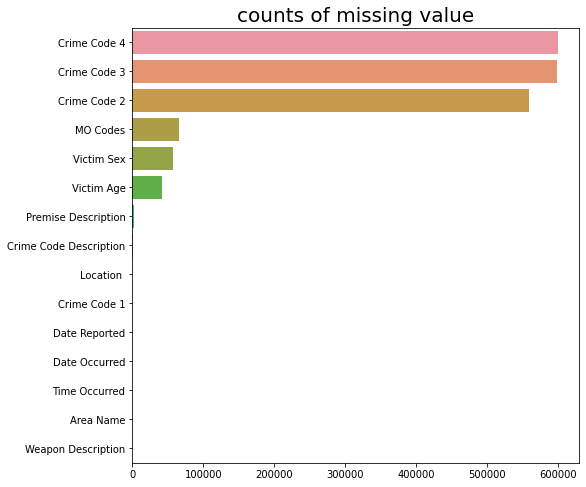

In [ ]:
# missing values
# check number then decide on dropping rows or filling


y=extracted_df.isnull().sum().sort_values(ascending=False)[:15].index
x=extracted_df.isnull().sum().sort_values(ascending=False)[:15]
plt.figure(figsize=(8,8))
sns.barplot(x,y)
plt.title("counts of missing value",size=20)


age = (extracted_df['Victim Age'].isna().sum()/extracted_df.shape[0])*100
gender = (extracted_df['Victim Sex'].isna().sum()/extracted_df.shape[0])*100
mo = (extracted_df['MO Codes'].isna().sum()/extracted_df.shape[0])*100
print(age)
print(gender)
print(mo)

In [ ]:
# join mo codes and and crime data
mo_codes_df['MO Codes']=mo_codes_df['MO Codes'].astype(int)
codes_list = ['mo_code1', 'mo_code2','mo_code3','mo_code4','mo_code5','mo_code6','mo_code7','mo_code8','mo_code9', 'mo_code10']

extracted_df[codes_list] = extracted_df['MO Codes'].str.split(' ', expand=True)
extracted_df[codes_list] = extracted_df[codes_list].fillna(-1)
extracted_df['Crime Code 4'] = extracted_df['Crime Code 4'].fillna(-1)
extracted_df['Crime Code 2'] = extracted_df['Crime Code 2'].fillna(-1)
extracted_df['Crime Code 3'] = extracted_df['Crime Code 3'].fillna(-1)

# print(extracted_df.columns)

extracted_df = extracted_df.drop(['MO Codes'], axis=1)
extracted_df

Date Reported Date Occurred  Time Occurred Area Name  \
0         09/12/2014    09/12/2014           1410   Topanga   
1         09/12/2014    09/12/2014            900   Topanga   
2         09/12/2014    09/12/2014           2230   Topanga   
3         09/12/2014    09/12/2014           2115   Topanga   
4         09/13/2014    09/12/2014           2145   Topanga   
...              ...           ...            ...       ...   
599995    09/07/2017    09/07/2017           1005   Topanga   
599996    09/07/2017    09/07/2017           1200   Topanga   
599997    08/30/2017    07/15/2017              1   Topanga   
599998    09/08/2017    09/08/2017           1845   Topanga   
599999    09/08/2017    07/12/2017           2230   Topanga   

                                Crime Code Description  Victim Age Victim Sex  \
0                                             BURGLARY        65.0          M   
1                                             BURGLARY        39.0          M   
2       ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        24.0          M   
3                             BATTERY - SIMPLE ASSAULT        15.0          M   
4                                        LETTERS, LEWD        25.0          M   
...                                                ...         ...        ...   
599995              THEFT PLAIN - PETTY ($950 & UNDER)        51.0          F   
599996                           BURGLARY FROM VEHICLE        40.0          M   
599997                DOCUMENT FORGERY / STOLEN FELONY        52.0          M   
599998                       OTHER MISCELLANEOUS CRIME        47.0          M   
599999           INTIMATE PARTNER - AGGRAVATED ASSAULT        42.0          F   

                                 Premise Description  \
0                             SINGLE FAMILY DWELLING   
1                             SINGLE FAMILY DWELLING   
2                                             STREET   
3                                             STREET   
4                                             STREET   
...                                              ...   
599995                        SINGLE FAMILY DWELLING   
599996                                   PARKING LOT   
599997                                OTHER BUSINESS   
599998                                        STREET   
599999  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   

                                    Weapon Description Status Description  \
0                                                 none        Invest Cont   
1                                                 none        Invest Cont   
2                                              VEHICLE        Invest Cont   
3       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)        Invest Cont   
4                                                 none       Adult Arrest   
...                                                ...                ...   
599995                                            none        Invest Cont   
599996                                            none        Invest Cont   
599997                                            none        Invest Cont   
599998                                            none        Invest Cont   
599999  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)        Invest Cont   

        ...  mo_code1  mo_code2  mo_code3  mo_code4 mo_code5 mo_code6  \
0       ...      1606      0344        -1        -1       -1       -1   
1       ...      1609      0344      0321        -1       -1       -1   
2       ...      1822      1309      0416        -1       -1       -1   
3       ...      0416        -1        -1        -1       -1       -1   
4       ...      0344      1402        -1        -1       -1       -1   
...     ...       ...       ...       ...       ...      ...      ...   
599995  ...      0344        -1        -1        -1       -1       -1   
599996  ...      0344      1605        -1        -1       -1       -1   
599997  ...      0930 

In [ ]:
for mo_i in codes_list:
  extracted_df[mo_i] = extracted_df[mo_i].astype(int)

for mo_i in codes_list:
  extracted_df[mo_i].replace(mo_codes_hashmap, inplace=True)
extracted_df


Date Reported Date Occurred  Time Occurred Area Name  \
0         09/12/2014    09/12/2014           1410   Topanga   
1         09/12/2014    09/12/2014            900   Topanga   
2         09/12/2014    09/12/2014           2230   Topanga   
3         09/12/2014    09/12/2014           2115   Topanga   
4         09/13/2014    09/12/2014           2145   Topanga   
...              ...           ...            ...       ...   
599995    09/07/2017    09/07/2017           1005   Topanga   
599996    09/07/2017    09/07/2017           1200   Topanga   
599997    08/30/2017    07/15/2017              1   Topanga   
599998    09/08/2017    09/08/2017           1845   Topanga   
599999    09/08/2017    07/12/2017           2230   Topanga   

                                Crime Code Description  Victim Age Victim Sex  \
0                                             BURGLARY        65.0          M   
1                                             BURGLARY        39.0          M   
2       ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        24.0          M   
3                             BATTERY - SIMPLE ASSAULT        15.0          M   
4                                        LETTERS, LEWD        25.0          M   
...                                                ...         ...        ...   
599995              THEFT PLAIN - PETTY ($950 & UNDER)        51.0          F   
599996                           BURGLARY FROM VEHICLE        40.0          M   
599997                DOCUMENT FORGERY / STOLEN FELONY        52.0          M   
599998                       OTHER MISCELLANEOUS CRIME        47.0          M   
599999           INTIMATE PARTNER - AGGRAVATED ASSAULT        42.0          F   

                                 Premise Description  \
0                             SINGLE FAMILY DWELLING   
1                             SINGLE FAMILY DWELLING   
2                                             STREET   
3                                             STREET   
4                                             STREET   
...                                              ...   
599995                        SINGLE FAMILY DWELLING   
599996                                   PARKING LOT   
599997                                OTHER BUSINESS   
599998                                        STREET   
599999  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   

                                    Weapon Description Status Description  \
0                                                 none        Invest Cont   
1                                                 none        Invest Cont   
2                                              VEHICLE        Invest Cont   
3       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)        Invest Cont   
4                                                 none       Adult Arrest   
...                                                ...                ...   
599995                                            none        Invest Cont   
599996                                            none        Invest Cont   
599997                                            none        Invest Cont   
599998                                            none        Invest Cont   
599999  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)        Invest Cont   

        ...                                           mo_code1  \
0       ...                                      Open/unlocked   
1       ...                                            Smashed   
2       ...                                           Stranger   
3       ...                                  Hit-Hit w/ weapon   
4       ...                              Removes vict property   
...     ...                                                ...   
599995  ...                              Removes vict property   
599996  ...                              Removes vict property   
599997  ...  Unauthorized use of victim's credit/debit card...   
599998  ...        

Removing Duplicates and Dropping N/A

In [ ]:
#remove duplications
extracted_df.shape

(600000, 25)

In [ ]:
extracted_df.drop_duplicates(inplace=True, ignore_index=True)

In [ ]:
extracted_df.dropna(inplace=True)

In [ ]:
extracted_df.shape

(497843, 25)

## Visualizations 

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

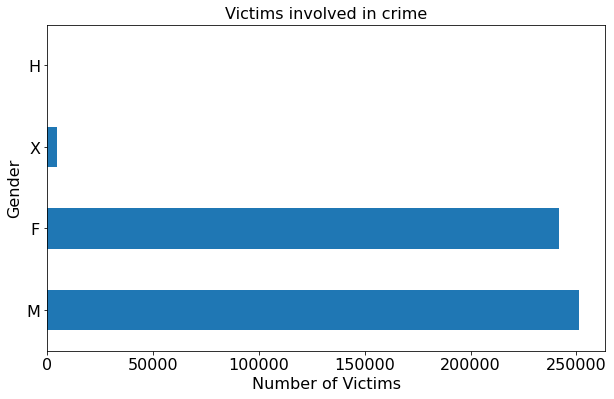

In [ ]:
# Find gender of victims involved in crime
victimCounts = extracted_df['Victim Sex'].value_counts()

fig = plt.figure()
victimCounts.plot.barh(figsize=(10, 6));
plt.title("Victims involved in crime", size=16)
plt.xlabel("Number of Victims", size=16);
plt.ylabel("Gender", size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

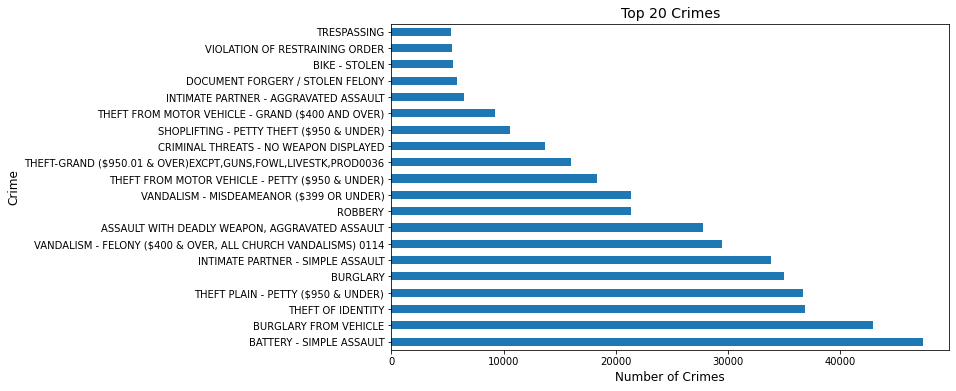

In [ ]:
# Top 20 crimes
topCrimes = extracted_df['Crime Code Description'].value_counts()

topCrimes = topCrimes[:20]
fig = plt.figure()
topCrimes.plot.barh(figsize=(10, 6));
plt.title("Top 20 Crimes", size=14)
plt.xlabel("Number of Crimes", size=12);
plt.ylabel("Crime", size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

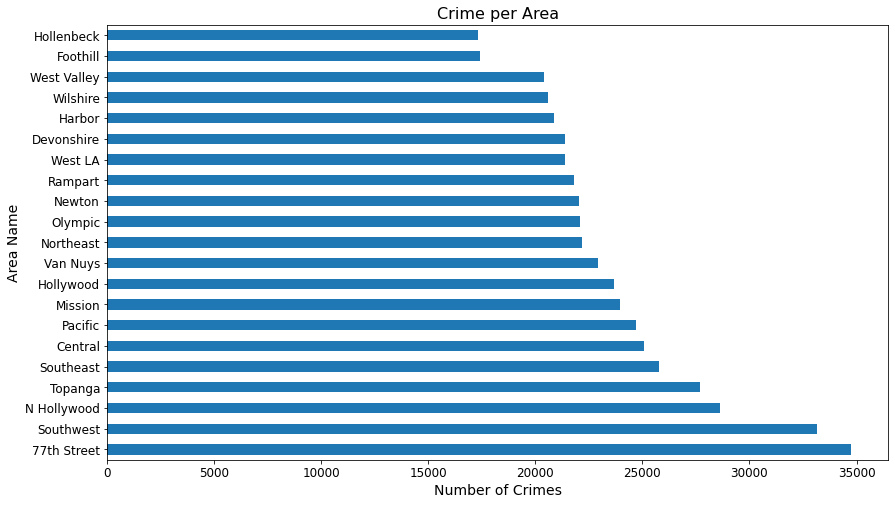

In [ ]:
# Crime per area
crimeAreas = extracted_df['Area Name'].value_counts()
# crimeAreas # Uncomment this line to get exact counts
fig = plt.figure()
crimeAreas.plot.barh(figsize=(14, 8));
plt.title("Crime per Area", size=16)
plt.xlabel("Number of Crimes", size=14);
plt.ylabel("Area Name", size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

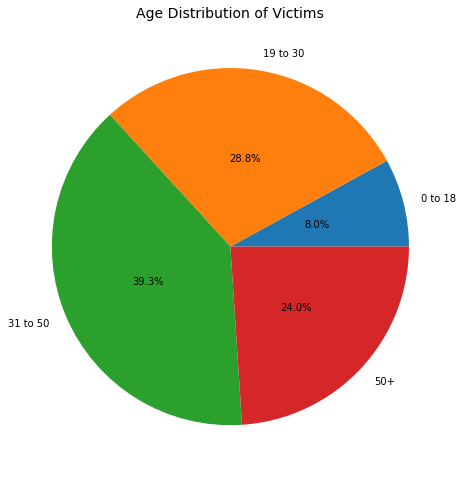

In [ ]:
# Age groups of victim
victimAge = extracted_df['Victim Age']
ageGroups = {}

g1 = extracted_df[extracted_df['Victim Age'] <= 18] # Age 0 to 18
g1Count = g1['Victim Age'].value_counts().sum()
ageGroups['0 to 18'] = g1Count

g2 = extracted_df[(extracted_df['Victim Age'] > 18) & (extracted_df['Victim Age'] <= 30)] # Age 19 to 30
g2Count = g2['Victim Age'].value_counts().sum()
ageGroups['19 to 30'] = g2Count

g3 = extracted_df[(extracted_df['Victim Age'] > 30) & (extracted_df['Victim Age'] <= 50)] # Age 31 to 50
g3Count = g3['Victim Age'].value_counts().sum()
ageGroups['31 to 50'] = g3Count

g4 = extracted_df[extracted_df['Victim Age'] > 50] # Age 50 and above
g4Count = g4['Victim Age'].value_counts().sum()
ageGroups['50+'] = g4Count

# ageGroups # Uncomment this line for actual counts

pie, ax = plt.subplots(figsize=[8,12])
# {'0 to 18': 97030, '19 to 30': 143859, '31 to 50': 196341, '50+': 120041}
plt.pie(x=ageGroups.values(), autopct="%.1f%%", labels=ageGroups.keys(), pctdistance=0.5)
plt.title("Age Distribution of Victims", fontsize=14);
pie.savefig("VictimAgeGroups.png")

In [ ]:
# Group by date time
dates = pd.to_datetime(extracted_df['Date Occurred']).to_frame()

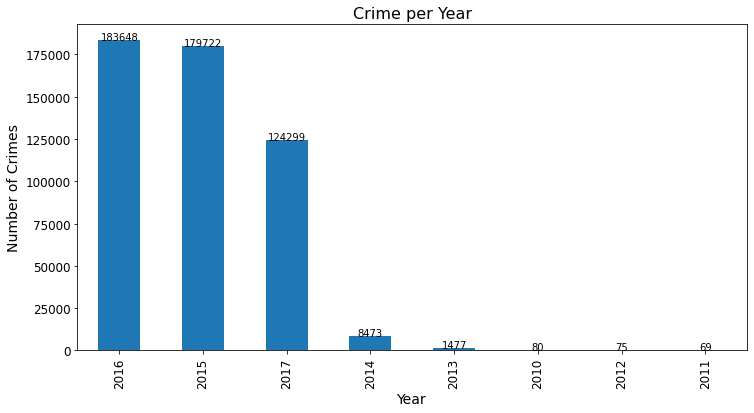

In [ ]:
# Plot by years
years = dates['Date Occurred'].dt.year.value_counts()
fig = plt.figure()
years.plot.bar(figsize=(12, 6));
plt.title("Crime per Year", size=16)
plt.xlabel("Year", size=14);
plt.ylabel("Number of Crimes", size=14)
plt.xticks(size=12)
plt.yticks(size=12)
addlabels(years.index, years.values)
plt.show()

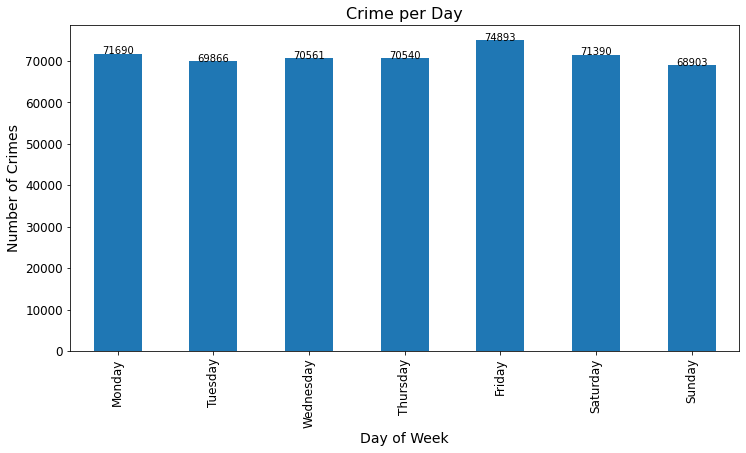

In [ ]:
# Plot by Day of Week
dayOfWeek = dates['Date Occurred'].dt.day_name().value_counts()
fig = plt.figure()
dayOfWeek = dayOfWeek.reindex(index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
dayOfWeek.plot.bar(figsize=(12, 6));
plt.title("Crime per Day", size=16)
plt.xlabel("Day of Week", size=14);
plt.ylabel("Number of Crimes", size=14)
plt.xticks(size=12)
plt.yticks(size=12)
addlabels(dayOfWeek.index, dayOfWeek.values)
plt.show()

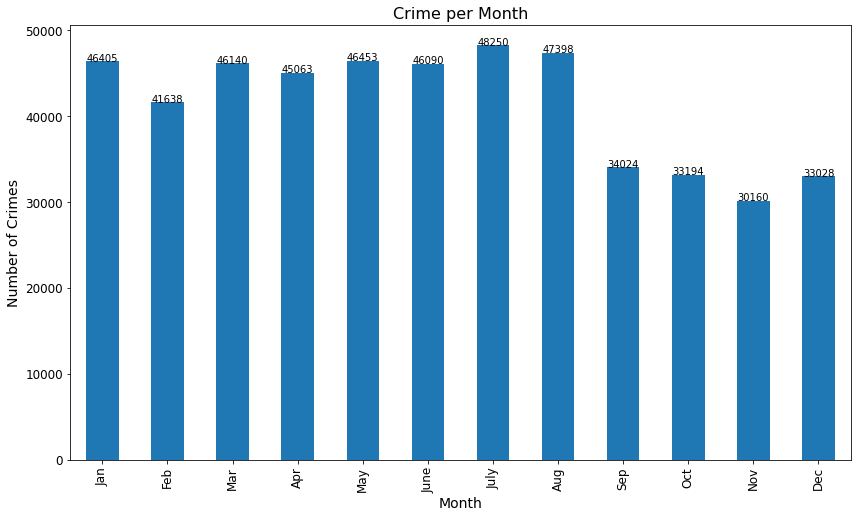

In [ ]:
# Plot by months
months = dates['Date Occurred'].dt.month.value_counts()
months = months.reindex(index = [1,2,3,4,5,6,7,8,9,10,11,12])
labels = ["Jan", "Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"]
months.index = labels
months.plot.bar(figsize=(14, 8));
plt.title("Crime per Month", size=16)
plt.xlabel("Month", size=14);
plt.ylabel("Number of Crimes", size=14)
plt.xticks(size=12)
plt.yticks(size=12)
addlabels(months.index, months.values)
plt.show()

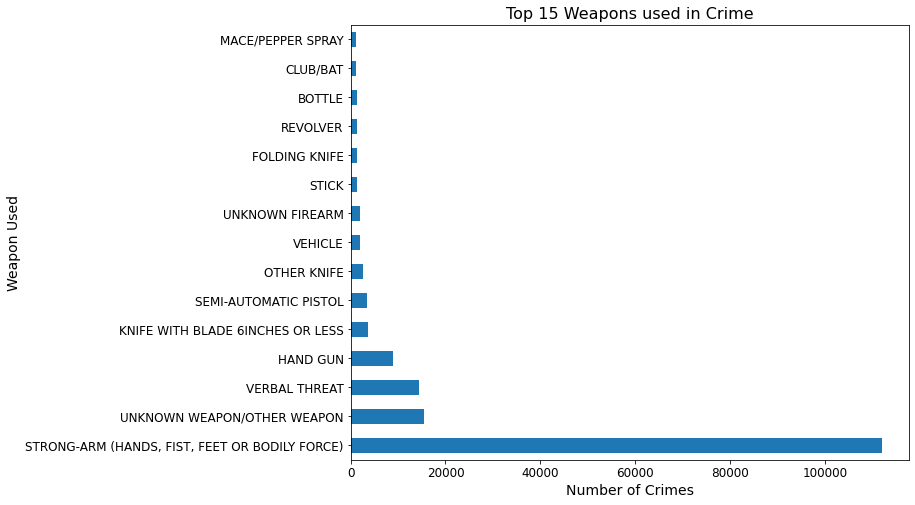

In [ ]:
# Top 15 weapons used in crime
weaponUsed = extracted_df['Weapon Description'].value_counts()[1:16]
# weaponUsed
fig = plt.figure()
weaponUsed.plot.barh(figsize=(10, 8));
plt.title("Top 15 Weapons used in Crime", size=16)
plt.xlabel("Number of Crimes", size=14);
plt.ylabel("Weapon Used", size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

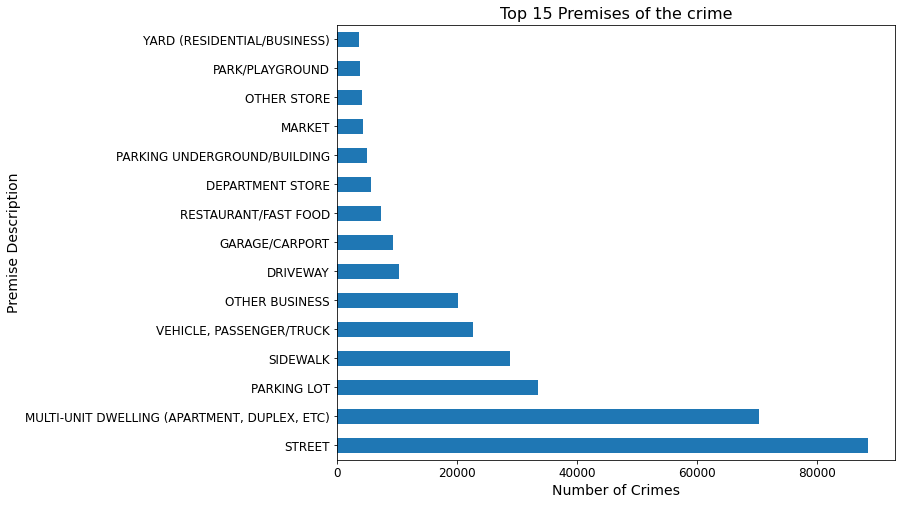

In [ ]:
# Top 15 premise locations
premise = extracted_df['Premise Description'].value_counts()[1:16]
# premise
fig = plt.figure()
premise.plot.barh(figsize=(10, 8));
plt.title("Top 15 Premises of the crime", size=16)
plt.xlabel("Number of Crimes", size=14);
plt.ylabel("Premise Description", size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

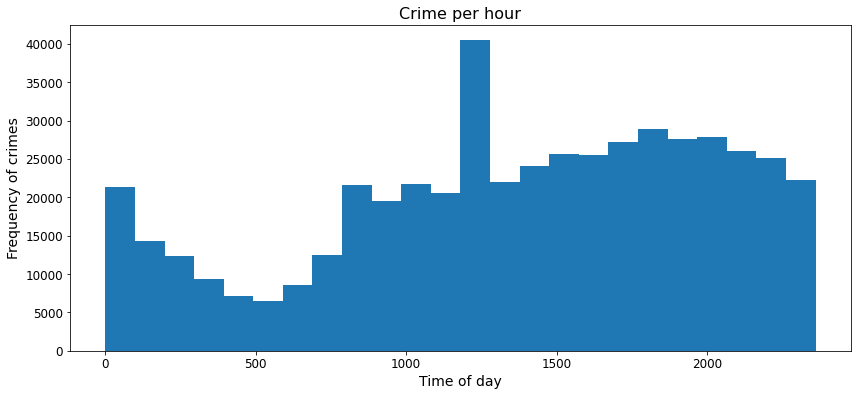

In [ ]:
# Plot by times
from matplotlib.pyplot import figure

figure(figsize=(14, 6))


time_list = []
n=100

for i in range(24):
  stuff = extracted_df[(extracted_df['Time Occurred'].astype(int)< 100+n*i) & (extracted_df['Time Occurred'].astype(int) > 0+n*i)]
  time_list.append(stuff.shape[0])

labels = ["0000", "0100","2","3","4","5","6","7","8","9","10","11","12", "13","14","15","16","17","18","19","20","21","22","23"]




plt.hist(extracted_df['Time Occurred'].astype(int), bins=24)


plt.title("Crime per hour", size=16)
plt.xlabel("Time of day", size=14);
plt.ylabel("Frequency of crimes", size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

## Crime Location Heatmaps

In [ ]:
import folium

In [ ]:
extracted_df['Location ']

0         (34.1628, -118.6246)
1         (34.1541, -118.5962)
2          (34.167, -118.5928)
3         (34.2083, -118.5754)
4          (34.201, -118.6147)
                  ...         
598415    (34.1883, -118.6536)
598416    (34.1905, -118.6059)
598417     (34.201, -118.5885)
598418    (34.2029, -118.6003)
598419    (34.2258, -118.5994)
Name: Location , Length: 497843, dtype: object

In [ ]:
topCrimesCopy = topCrimes[:10].index.tolist()
topCrimesCopy

['BATTERY - SIMPLE ASSAULT',
 'BURGLARY FROM VEHICLE',
 'THEFT OF IDENTITY',
 'THEFT PLAIN - PETTY ($950 & UNDER)',
 'BURGLARY',
 'INTIMATE PARTNER - SIMPLE ASSAULT',
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114',
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
 'ROBBERY',
 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)']

In [ ]:
map_list = list()
for crime in topCrimesCopy:
    top = extracted_df[extracted_df['Crime Code Description'] == crime]
    incidents_in_2016= top[pd.DatetimeIndex(top['Date Occurred']).year == 2016]
    # Process GPS coordinates
    location = pd.DataFrame(incidents_in_2016['Location '])
    coordinates = []
    for _, row in location.iterrows():
      try:
        t = str(row[0]).replace("(","").replace(")","")
        t1 = t.split(",")
        lat = t1[0].strip()
        lon = t1[1].strip()
        coordinates.append([float(lat),float(lon)])
      except Exception as e:
        continue
    locations = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])
    map = folium.Map(location=[locations.Latitude.mean(), locations.Longitude.mean()], zoom_start=14, control_scale=True)
    # convert to (n, 2) nd-array format for heatmap
    from folium import plugins




    dfmatrix = locations.values
    # plot heatmap
    map.add_child(plugins.HeatMap(dfmatrix, radius=15))
    map_list.append(map)


In [ ]:
# Year 2016 and Battery
map_list[0]

In [ ]:
# Year 2016 and Vehicle Stolen
map_list[1]

In [ ]:
# Year 2016 and Burglary from Vehicle
map_list[2]

In [ ]:
# Year 2016 and Theft Plain
map_list[3]

In [ ]:
# Year 2016 and Burglary
map_list[4]

In [ ]:
# Year 2016 and Theft of Identity
map_list[5]

In [ ]:
# Year 2016 and Intimate Partner
map_list[6]

In [ ]:
# Year 2016 and Vandalism
map_list[7]

In [ ]:
# Year 2016 and Assault with deadly weapon
map_list[8]

In [ ]:
# Year 2016 and Theft from motor vehicle
map_list[9]

## Final Dataframe

In [ ]:
extracted_df

Date Reported Date Occurred  Time Occurred Area Name  \
0         09/12/2014    09/12/2014           1410   Topanga   
1         09/12/2014    09/12/2014            900   Topanga   
2         09/12/2014    09/12/2014           2230   Topanga   
3         09/12/2014    09/12/2014           2115   Topanga   
4         09/13/2014    09/12/2014           2145   Topanga   
...              ...           ...            ...       ...   
598415    09/07/2017    09/07/2017           1005   Topanga   
598416    09/07/2017    09/07/2017           1200   Topanga   
598417    08/30/2017    07/15/2017              1   Topanga   
598418    09/08/2017    09/08/2017           1845   Topanga   
598419    09/08/2017    07/12/2017           2230   Topanga   

                                Crime Code Description  Victim Age Victim Sex  \
0                                             BURGLARY        65.0          M   
1                                             BURGLARY        39.0          M   
2       ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        24.0          M   
3                             BATTERY - SIMPLE ASSAULT        15.0          M   
4                                        LETTERS, LEWD        25.0          M   
...                                                ...         ...        ...   
598415              THEFT PLAIN - PETTY ($950 & UNDER)        51.0          F   
598416                           BURGLARY FROM VEHICLE        40.0          M   
598417                DOCUMENT FORGERY / STOLEN FELONY        52.0          M   
598418                       OTHER MISCELLANEOUS CRIME        47.0          M   
598419           INTIMATE PARTNER - AGGRAVATED ASSAULT        42.0          F   

                                 Premise Description  \
0                             SINGLE FAMILY DWELLING   
1                             SINGLE FAMILY DWELLING   
2                                             STREET   
3                                             STREET   
4                                             STREET   
...                                              ...   
598415                        SINGLE FAMILY DWELLING   
598416                                   PARKING LOT   
598417                                OTHER BUSINESS   
598418                                        STREET   
598419  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   

                                    Weapon Description Status Description  \
0                                                 none        Invest Cont   
1                                                 none        Invest Cont   
2                                              VEHICLE        Invest Cont   
3       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)        Invest Cont   
4                                                 none       Adult Arrest   
...                                                ...                ...   
598415                                            none        Invest Cont   
598416                                            none        Invest Cont   
598417                                            none        Invest Cont   
598418                                            none        Invest Cont   
598419  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)        Invest Cont   

        ...                                           mo_code1  \
0       ...                                      Open/unlocked   
1       ...                                            Smashed   
2       ...                                           Stranger   
3       ...                                  Hit-Hit w/ weapon   
4       ...                              Removes vict property   
...     ...                                                ...   
598415  ...                              Removes vict property   
598416  ...                              Removes vict property   
598417  ...  Unauthorized use of victim's credit/debit card...   
598418  ...        

# Data Mining

In [ ]:
final_df = extracted_df
final_df

Date Reported Date Occurred  Time Occurred Area Name  \
0         09/12/2014    09/12/2014           1410   Topanga   
1         09/12/2014    09/12/2014            900   Topanga   
2         09/12/2014    09/12/2014           2230   Topanga   
3         09/12/2014    09/12/2014           2115   Topanga   
4         09/13/2014    09/12/2014           2145   Topanga   
...              ...           ...            ...       ...   
598415    09/07/2017    09/07/2017           1005   Topanga   
598416    09/07/2017    09/07/2017           1200   Topanga   
598417    08/30/2017    07/15/2017              1   Topanga   
598418    09/08/2017    09/08/2017           1845   Topanga   
598419    09/08/2017    07/12/2017           2230   Topanga   

                                Crime Code Description  Victim Age Victim Sex  \
0                                             BURGLARY        65.0          M   
1                                             BURGLARY        39.0          M   
2       ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        24.0          M   
3                             BATTERY - SIMPLE ASSAULT        15.0          M   
4                                        LETTERS, LEWD        25.0          M   
...                                                ...         ...        ...   
598415              THEFT PLAIN - PETTY ($950 & UNDER)        51.0          F   
598416                           BURGLARY FROM VEHICLE        40.0          M   
598417                DOCUMENT FORGERY / STOLEN FELONY        52.0          M   
598418                       OTHER MISCELLANEOUS CRIME        47.0          M   
598419           INTIMATE PARTNER - AGGRAVATED ASSAULT        42.0          F   

                                 Premise Description  \
0                             SINGLE FAMILY DWELLING   
1                             SINGLE FAMILY DWELLING   
2                                             STREET   
3                                             STREET   
4                                             STREET   
...                                              ...   
598415                        SINGLE FAMILY DWELLING   
598416                                   PARKING LOT   
598417                                OTHER BUSINESS   
598418                                        STREET   
598419  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   

                                    Weapon Description Status Description  \
0                                                 none        Invest Cont   
1                                                 none        Invest Cont   
2                                              VEHICLE        Invest Cont   
3       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)        Invest Cont   
4                                                 none       Adult Arrest   
...                                                ...                ...   
598415                                            none        Invest Cont   
598416                                            none        Invest Cont   
598417                                            none        Invest Cont   
598418                                            none        Invest Cont   
598419  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)        Invest Cont   

        ...                                           mo_code1  \
0       ...                                      Open/unlocked   
1       ...                                            Smashed   
2       ...                                           Stranger   
3       ...                                  Hit-Hit w/ weapon   
4       ...                              Removes vict property   
...     ...                                                ...   
598415  ...                              Removes vict property   
598416  ...                              Removes vict property   
598417  ...  Unauthorized use of victim's credit/debit card...   
598418  ...        

## Frequent Itemsets Mining

In [ ]:
! pip install --upgrade mlxtend

### Frequent Patterns in Mo_Codes

In [ ]:
only_mo_codes = final_df[['mo_code1', 'mo_code2','mo_code3','mo_code4','mo_code5','mo_code6','mo_code7','mo_code8','mo_code9', 'mo_code10']]

In [ ]:
codes_list = ['mo_code1', 'mo_code2','mo_code3','mo_code4','mo_code5','mo_code6','mo_code7','mo_code8','mo_code9', 'mo_code10']
for code in codes_list:
  only_mo_codes [code] = only_mo_codes [code].replace(-1,'none')
only_mo_codes 

mo_code1  \
0                                           Open/unlocked   
1                                                 Smashed   
2                                                Stranger   
3                                       Hit-Hit w/ weapon   
4                                   Removes vict property   
...                                                   ...   
598415                              Removes vict property   
598416                              Removes vict property   
598417  Unauthorized use of victim's credit/debit card...   
598418                        Evidence Booked (any crime)   
598419                                         Force used   

                                             mo_code2           mo_code3  \
0                               Removes vict property               none   
1                               Removes vict property          Ransacked   
2                                   Susp uses vehicle  Hit-Hit w/ weapon   
3                                                none               none   
4                         Evidence Booked (any crime)               none   
...                                               ...                ...   
598415                                           none               none   
598416                             Lock slip/key/pick               none   
598417                                       Stranger               none   
598418                                           none               none   
598419  Susp is/was current/former spouse/co-habitant  Domestic violence   

       mo_code4 mo_code5 mo_code6 mo_code7 mo_code8 mo_code9 mo_code10  
0          none     none     none     none     none     none      none  
1          none     none     none     none     none     none      none  
2          none     none     none     none     none     none      none  
3          none     none     none     none     none     none      none  
4          none     none     none     none     none     none      none  
...         ...      ...      ...      ...      ...      ...       ...  
598415     none     none     none     none     none     none      none  
598416     none     none     none     none     none     none      none  
598417     none     none     none     none     none     none      none  
598418     none     none     none     none     none     none      none  
598419     none     none     none     none     none     none      none  

[497843 rows x 10 columns]

In [ ]:
only_mo_codes = only_mo_codes.astype(str)
only_mo_codes = only_mo_codes[:].values
only_mo_codes

array([['Open/unlocked', 'Removes vict property', 'none', ..., 'none',
        'none', 'none'],
       ['Smashed', 'Removes vict property', 'Ransacked', ..., 'none',
        'none', 'none'],
       ['Stranger', 'Susp uses vehicle', 'Hit-Hit w/ weapon', ...,
        'none', 'none', 'none'],
       ...,
       ["Unauthorized use of victim's credit/debit card or number",
        'Stranger', 'none', ..., 'none', 'none', 'none'],
       ['Evidence Booked (any crime)', 'none', 'none', ..., 'none',
        'none', 'none'],
       ['Force used', 'Susp is/was current/former spouse/co-habitant',
        'Domestic violence', ..., 'none', 'none', 'none']], dtype=object)

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(only_mo_codes).transform(only_mo_codes)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

2017   2018   2019   2020   2021   2023   2024   2026   2027   2028  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
497838  False  False  False  False  False  False  False  False  False  False   
497839  False  False  False  False  False  False  False  False  False  False   
497840  False  False  False  False  False  False  False  False  False  False   
497841  False  False  False  False  False  False  False  False  False  False   
497842  False  False  False  False  False  False  False  False  False  False   

        ...  Victims vehicle taken  Video surveillance booked/available  \
0       ...                  False                                False   
1       ...                  False                                False   
2       ...                  False                                False   
3       ...                  False                                False   
4       ...                  False                                False   
...     ...                    ...                                  ...   
497838  ...                  False                                False   
497839  ...                  False                                False   
497840  ...                  False                                False   
497841  ...                  False                                False   
497842  ...                  False                                False   

        Weapon (other than gun) in waistband  Weapon Concealed  Whipped  \
0                                      False             False    False   
1                                      False             False    False   
2                                      False             False    False   
3                                      False             False    False   
4                                      False             False    False   
...                                      ...               ...      ...   
497838                                 False             False    False   
497839                                 False             False    False   
497840                                 False             False    False   
497841                                 False             False    False   
497842                                 False             False    False   

          Wig   Wire  appraise  \
0       False  False     False   
1       False  False     False   
2       False  False     False   
3       False  False     False   
4       False  False     False   
...       ...    ...       ...   
497838  False  False     False   
497839  False  False     False   
497840  False  False     False   
497841  False  False     False   
497842  False  False     False   

        costumed character (e.g., Barney, Darth Vader, Spiderman, etc.)  none  
0                                                   False                True  
1                                                   False                True  
2                                                   False                True  
3                                                   False                True  
4                                                   False                True  
...                                                   ...                 ...  
497838                                              False                True  
497839                                              False                True  
497840                                              False                True  
497841                               

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

In [ ]:
frequent_sets = fpgrowth(df, min_support=0.02, use_colnames=True)
print(frequent_sets.to_string())

     support                                                                                   itemsets
0   0.989706                                                                                     (none)
1   0.360306                                                                    (Removes vict property)
2   0.028282                                                                            (Open/unlocked)
3   0.042339                                                                                  (Smashed)
4   0.029003                                                                                (Ransacked)
5   0.151972                                                                        (Hit-Hit w/ weapon)
6   0.107196                                                                                 (Stranger)
7   0.043375                                                                        (Susp uses vehicle)
8   0.055262                                                    

In [ ]:
indices = list()
for ind in frequent_sets.index:
  if 'none' in frequent_sets['itemsets'][ind]:
    indices.append(ind)
frequent_sets = frequent_sets.drop(indices)
frequent_sets

support                                           itemsets
1   0.360306                            (Removes vict property)
2   0.028282                                    (Open/unlocked)
3   0.042339                                          (Smashed)
4   0.029003                                        (Ransacked)
5   0.151972                                (Hit-Hit w/ weapon)
6   0.107196                                         (Stranger)
7   0.043375                                (Susp uses vehicle)
8   0.055262                      (Evidence Booked (any crime))
9   0.044175  (Susp is/was current/former boyfriend/girlfriend)
10  0.020408  (Unauthorized use of victim's credit/debit car...
11  0.038269                               (Other MO (see rpt))
12  0.102430                                (Domestic violence)
13  0.035646    (Susp is/was current/former spouse/co-habitant)
14  0.050335  (Aged (60 & over) or blind/crippled/unable to ...
15  0.027284       (Takes vict's identification/driver license)
16  0.024560                                            (Pried)
17  0.028374                                 (Took merchandise)
18  0.030708                                            (Gangs)
19  0.029529                                 (Threaten to kill)
20  0.031263                                          (Grabbed)
21  0.064870                              (Victim knew Suspect)
22  0.031369                           (Vict knocked to ground)
23  0.023212                (Took Victim's clothing or jewelry)
24  0.022722                              (Suspect Impersonate)
25  0.046531                                           (Pushed)
26  0.127827                                       (Vandalized)
27  0.035246                                    (Breaks window)
28  0.064472                                       (Force used)
29  0.036753                                (Brandishes weapon)
30  0.029198                            (Multi-susps overwhelm)
31  0.022053                                     (Forces Entry)
32  0.056379                                 (Vehicle involved)
33  0.031964                                     (Intimidation)
34  0.022597                               (Suspect swung fist)
35  0.028141                             (Victim was a student)
36  0.020981                    (Suspect is homeless/transient)
39  0.025291             (Open/unlocked, Removes vict property)
42  0.033426                   (Removes vict property, Smashed)
45  0.022385                 (Removes vict property, Ransacked)
52  0.036443  (Susp is/was current/former boyfriend/girlfrie...
57  0.047593             (Domestic violence, Hit-Hit w/ weapon)
60  0.032514  (Susp is/was current/former spouse/co-habitant...
63  0.021384  (Removes vict property, Aged (60 & over) or bl...
72  0.022099           (Victim knew Suspect, Hit-Hit w/ weapon)
80  0.020569             (Removes vict property, Breaks window)
83  0.021720                    (Force used, Hit-Hit w/ weapon)
89  0.021358                     (Vandalized, Vehicle involved)
90  0.025731          (Removes vict property, Vehicle involved)

In [ ]:
frequent_sets['length'] = frequent_sets['itemsets'].apply(lambda x: len(x))
frequent_sets[(frequent_sets['length'] == 2)]


support                                           itemsets  length
39  0.025291             (Open/unlocked, Removes vict property)       2
42  0.033426                   (Removes vict property, Smashed)       2
45  0.022385                 (Removes vict property, Ransacked)       2
52  0.036443  (Susp is/was current/former boyfriend/girlfrie...       2
57  0.047593             (Domestic violence, Hit-Hit w/ weapon)       2
60  0.032514  (Susp is/was current/former spouse/co-habitant...       2
63  0.021384  (Removes vict property, Aged (60 & over) or bl...       2
72  0.022099           (Victim knew Suspect, Hit-Hit w/ weapon)       2
80  0.020569             (Removes vict property, Breaks window)       2
83  0.021720                    (Force used, Hit-Hit w/ weapon)       2
89  0.021358                     (Vandalized, Vehicle involved)       2
90  0.025731          (Removes vict property, Vehicle involved)       2

In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_sets, metric="confidence", min_threshold=0.7)
rules

antecedents              consequents  \
0                                    (Open/unlocked)  (Removes vict property)   
1                                          (Smashed)  (Removes vict property)   
2                                        (Ransacked)  (Removes vict property)   
3  (Susp is/was current/former boyfriend/girlfriend)      (Domestic violence)   
4    (Susp is/was current/former spouse/co-habitant)      (Domestic violence)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.028282            0.360306  0.025291    0.894247  2.481908   
1            0.042339            0.360306  0.033426    0.789496  2.191180   
2            0.029003            0.360306  0.022385    0.771799  2.142062   
3            0.044175            0.102430  0.036443    0.824982  8.054113   
4            0.035646            0.102430  0.032514    0.912149  8.905108   

   leverage  conviction  
0  0.015101    6.048950  
1  0.018171    3.038869  
2  0.011935    2.803198  
3  0.031918    5.128439  
4  0.028863   10.216985

### Frequent Patterns - Time and Crime Description

In [ ]:
time_and_description = final_df[['Time Occurred', 'Crime Code Description']]
time_and_description = time_and_description.astype(str)
time_and_description

Time Occurred                          Crime Code Description
0               1410                                        BURGLARY
1                900                                        BURGLARY
2               2230  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
3               2115                        BATTERY - SIMPLE ASSAULT
4               2145                                   LETTERS, LEWD
...              ...                                             ...
598415          1005              THEFT PLAIN - PETTY ($950 & UNDER)
598416          1200                           BURGLARY FROM VEHICLE
598417             1                DOCUMENT FORGERY / STOLEN FELONY
598418          1845                       OTHER MISCELLANEOUS CRIME
598419          2230           INTIMATE PARTNER - AGGRAVATED ASSAULT

[497843 rows x 2 columns]

In [ ]:
for ind in time_and_description.index:
    no_of_zeros = 4 - len(time_and_description['Time Occurred'][ind])
    if no_of_zeros > 0:
      temp = time_and_description['Time Occurred'][ind]
      for _ in range(no_of_zeros):
        temp = '0' + temp
      time_and_description['Time Occurred'][ind] = temp
time_and_description

Time Occurred                          Crime Code Description
0               1410                                        BURGLARY
1               0900                                        BURGLARY
2               2230  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
3               2115                        BATTERY - SIMPLE ASSAULT
4               2145                                   LETTERS, LEWD
...              ...                                             ...
598415          1005              THEFT PLAIN - PETTY ($950 & UNDER)
598416          1200                           BURGLARY FROM VEHICLE
598417          0001                DOCUMENT FORGERY / STOLEN FELONY
598418          1845                       OTHER MISCELLANEOUS CRIME
598419          2230           INTIMATE PARTNER - AGGRAVATED ASSAULT

[497843 rows x 2 columns]

In [ ]:
def time_in_range(start, end, current):
    """Returns whether current is in the range [start, end]"""
    return start <= current <= end


In [ ]:
from datetime import datetime
time_intervals = ['12 AM to 6 AM', '6 AM to 12 PM', '12 PM to 6 PM', '6 PM to 12 AM']

first_interval_start = '0000'
first_interval_end = '0559'

second_interval_start = '0600'
second_interval_end = '1159'

third_interval_start = '1200'
third_interval_end = '1759'

fourth_interval_start = '1800'
fourth_interval_end = '2359'


for ind in time_and_description.index:
  current = time_and_description['Time Occurred'][ind]
  if time_in_range(first_interval_start, first_interval_end, current):
    time_and_description['Time Occurred'][ind] = time_intervals[0]
  elif time_in_range(second_interval_start, second_interval_end, current):
    time_and_description['Time Occurred'][ind] = time_intervals[1]
  elif time_in_range(third_interval_start, third_interval_end, current):
    time_and_description['Time Occurred'][ind] = time_intervals[2]
  elif time_in_range(fourth_interval_start, fourth_interval_end, current):
    time_and_description['Time Occurred'][ind] = time_intervals[3]

time_and_description

Time Occurred                          Crime Code Description
0       12 PM to 6 PM                                        BURGLARY
1       6 AM to 12 PM                                        BURGLARY
2       6 PM to 12 AM  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
3       6 PM to 12 AM                        BATTERY - SIMPLE ASSAULT
4       6 PM to 12 AM                                   LETTERS, LEWD
...               ...                                             ...
598415  6 AM to 12 PM              THEFT PLAIN - PETTY ($950 & UNDER)
598416  12 PM to 6 PM                           BURGLARY FROM VEHICLE
598417  12 AM to 6 AM                DOCUMENT FORGERY / STOLEN FELONY
598418  6 PM to 12 AM                       OTHER MISCELLANEOUS CRIME
598419  6 PM to 12 AM           INTIMATE PARTNER - AGGRAVATED ASSAULT

[497843 rows x 2 columns]

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
time_and_description = time_and_description[:].values
te = TransactionEncoder()
te_ary = te.fit(time_and_description).transform(time_and_description)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

12 AM to 6 AM  12 PM to 6 PM  6 AM to 12 PM  6 PM to 12 AM  ARSON  \
0               False           True          False          False  False   
1               False          False           True          False  False   
2               False          False          False           True  False   
3               False          False          False           True  False   
4               False          False          False           True  False   
...               ...            ...            ...            ...    ...   
497838          False          False           True          False  False   
497839          False           True          False          False  False   
497840           True          False          False          False  False   
497841          False          False          False           True  False   
497842          False          False          False           True  False   

        ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   
...                                              ...   
497838                                         False   
497839                                         False   
497840                                         False   
497841                                         False   
497842                                         False   

        ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ATTEMPTED ROBBERY  \
0                                                False              False   
1                                                False              False   
2                                                 True              False   
3                                                False              False   
4                                                False              False   
...                                                ...                ...   
497838                                           False              False   
497839                                           False              False   
497840                                           False              False   
497841                                           False              False   
497842                                           False              False   

        BATTERY - SIMPLE ASSAULT  BATTERY ON A FIREFIGHTER  ...  TRESPASSING  \
0                          False                     False  ...        False   
1                          False                     False  ...        False   
2                          False                     False  ...        False   
3                           True                     False  ...        False   
4                          False                     False  ...        False   
...                          ...                       ...  ...          ...   
497838                     False                     False  ...        False   
497839                     False                     False  ...        False   
497840                     False                     False  ...        False   
497841                     False                     False  ...        False   
497842                     False                     False  ...        False   

        UNAUTHORIZED COMPUTER ACCESS  \
0                              False   
1                              False   
2                              False   
3                              False   
4                              False   
...                              ...   
497838                         False   
497839                         False   
497840                         False   
497841                         False   
497842                         False   

        VANDALISM - FELONY ($400 & OVER, AL

In [ ]:
from mlxtend.frequent_patterns import fpgrowth
frequent_sets = fpgrowth(df, min_support=0.02, use_colnames=True)
print(frequent_sets.to_string())

     support                                                                       itemsets
0   0.331189                                                                (12 PM to 6 PM)
1   0.070257                                                                     (BURGLARY)
2   0.209466                                                                (6 AM to 12 PM)
3   0.316833                                                                (6 PM to 12 AM)
4   0.055755                               (ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT)
5   0.095068                                                     (BATTERY - SIMPLE ASSAULT)
6   0.074019                                                            (THEFT OF IDENTITY)
7   0.073694                                           (THEFT PLAIN - PETTY ($950 & UNDER))
8   0.021177                                     (SHOPLIFTING - PETTY THEFT ($950 & UNDER))
9   0.027466                                       (CRIMINAL THREATS - NO WEAPON

In [ ]:
frequent_sets['length'] = frequent_sets['itemsets'].apply(lambda x: len(x))
frequent_sets[(frequent_sets['length'] == 2)]

support                                           itemsets  length
18  0.023148                          (BURGLARY, 12 PM to 6 PM)       2
19  0.021505                          (6 AM to 12 PM, BURGLARY)       2
20  0.020253  (6 PM to 12 AM, ASSAULT WITH DEADLY WEAPON, AG...       2
21  0.031156          (6 PM to 12 AM, BATTERY - SIMPLE ASSAULT)       2
22  0.032219          (12 PM to 6 PM, BATTERY - SIMPLE ASSAULT)       2
23  0.035592                 (THEFT OF IDENTITY, 12 PM to 6 PM)       2
24  0.022009                 (6 AM to 12 PM, THEFT OF IDENTITY)       2
25  0.030680  (12 PM to 6 PM, THEFT PLAIN - PETTY ($950 & UN...       2
26  0.025363  (6 PM to 12 AM, INTIMATE PARTNER - SIMPLE ASSA...       2
27  0.024094  (6 PM to 12 AM, VANDALISM - FELONY ($400 & OVE...       2
28  0.042333             (6 PM to 12 AM, BURGLARY FROM VEHICLE)       2
29  0.020145             (12 PM to 6 PM, BURGLARY FROM VEHICLE)       2

In [ ]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_sets)
rules

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

### Frequent Itemsets - Area Name and Crime

In [ ]:
area_and_crime = final_df[['Area Name', 'Crime Code Description']]
area_and_crime = area_and_crime.astype(str)
area_and_crime

Area Name                          Crime Code Description
0        Topanga                                        BURGLARY
1        Topanga                                        BURGLARY
2        Topanga  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
3        Topanga                        BATTERY - SIMPLE ASSAULT
4        Topanga                                   LETTERS, LEWD
...          ...                                             ...
598415   Topanga              THEFT PLAIN - PETTY ($950 & UNDER)
598416   Topanga                           BURGLARY FROM VEHICLE
598417   Topanga                DOCUMENT FORGERY / STOLEN FELONY
598418   Topanga                       OTHER MISCELLANEOUS CRIME
598419   Topanga           INTIMATE PARTNER - AGGRAVATED ASSAULT

[497843 rows x 2 columns]

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
area_and_crime = area_and_crime[:].values
te = TransactionEncoder()
te_ary = te.fit(area_and_crime).transform(area_and_crime)
df = pd.DataFrame(te_ary.astype("int"), columns=te.columns_)
df

77th Street  ARSON  ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER  \
0                 0      0                                             0   
1                 0      0                                             0   
2                 0      0                                             0   
3                 0      0                                             0   
4                 0      0                                             0   
...             ...    ...                                           ...   
497838            0      0                                             0   
497839            0      0                                             0   
497840            0      0                                             0   
497841            0      0                                             0   
497842            0      0                                             0   

        ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ATTEMPTED ROBBERY  \
0                                                    0                  0   
1                                                    0                  0   
2                                                    1                  0   
3                                                    0                  0   
4                                                    0                  0   
...                                                ...                ...   
497838                                               0                  0   
497839                                               0                  0   
497840                                               0                  0   
497841                                               0                  0   
497842                                               0                  0   

        BATTERY - SIMPLE ASSAULT  BATTERY ON A FIREFIGHTER  \
0                              0                         0   
1                              0                         0   
2                              0                         0   
3                              1                         0   
4                              0                         0   
...                          ...                       ...   
497838                         0                         0   
497839                         0                         0   
497840                         0                         0   
497841                         0                         0   
497842                         0                         0   

        BATTERY POLICE (SIMPLE)  BATTERY WITH SEXUAL CONTACT  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   
...                         ...                          ...   
497838                        0                            0   
497839                        0                            0   
497840                        0                            0   
497841                        0                            0   
497842                        0                            0   

        BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM0065  ...  \
0                                                       0             ...   
1                                                       0             ...   
2                                                       0             ...   
3                                                       0             ...   
4                                                       0             ...   
...                                                   ...             ...   
497838                                                  0             ...   
497839                                  

In [ ]:
from mlxtend.frequent_patterns import fpgrowth
frequent_sets = fpgrowth(df, min_support=0.0002, use_colnames=True)
print(frequent_sets.to_string())

      support                                                                     itemsets
0    0.070257                                                                   (BURGLARY)
1    0.055664                                                                    (Topanga)
2    0.055755                             (ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT)
3    0.095068                                                   (BATTERY - SIMPLE ASSAULT)
4    0.009541                                                              (LETTERS, LEWD)
5    0.000574                                                             (CHILD STEALING)
6    0.074019                                                          (THEFT OF IDENTITY)
7    0.073694                                         (THEFT PLAIN - PETTY ($950 & UNDER))
8    0.005743                                                         (BUNCO, GRAND THEFT)
9    0.010644                                                                (TRESPASSING)

In [ ]:
frequent_sets['length'] = frequent_sets['itemsets'].apply(lambda x: len(x))
frequent_sets[(frequent_sets['length'] == 2)]

support                                           itemsets  length
106  0.005421                                (BURGLARY, Topanga)       2
107  0.001715  (ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAUL...       2
108  0.003875                (BATTERY - SIMPLE ASSAULT, Topanga)       2
109  0.005450                       (THEFT OF IDENTITY, Topanga)       2
110  0.005227      (THEFT PLAIN - PETTY ($950 & UNDER), Topanga)       2
..        ...                                                ...     ...
713  0.002822                       (Olympic, THEFT OF IDENTITY)       2
714  0.002258  (Olympic, VANDALISM - FELONY ($400 & OVER, ALL...       2
715  0.002816      (Olympic, THEFT PLAIN - PETTY ($950 & UNDER))       2
716  0.003503       (Olympic, INTIMATE PARTNER - SIMPLE ASSAULT)       2
717  0.002292  (Olympic, ASSAULT WITH DEADLY WEAPON, AGGRAVAT...       2

[612 rows x 3 columns]

In [ ]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_sets)
rules

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

## 2d Clustering

In [ ]:
extracted_df = extracted_df.reset_index(drop=True) 

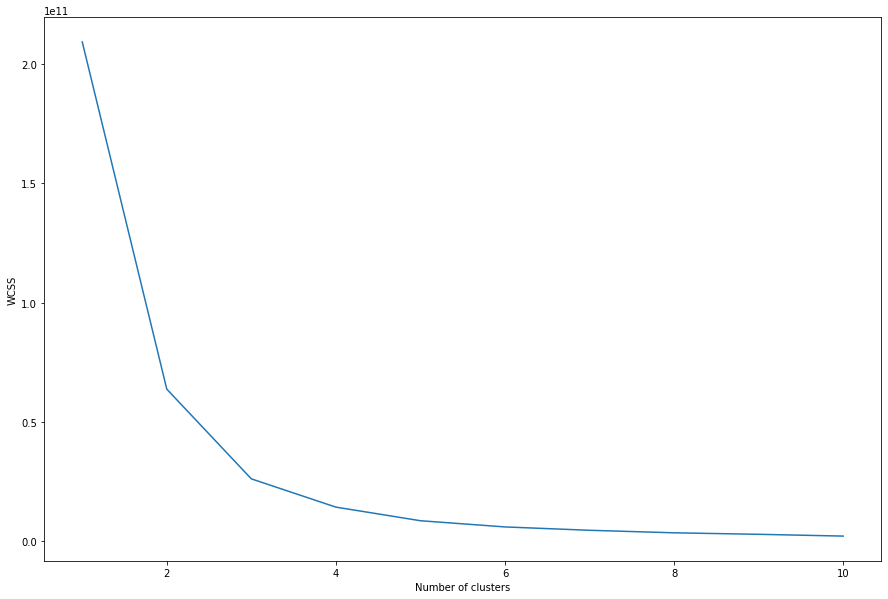

In [ ]:
from sklearn.cluster import KMeans

plt.figure(figsize=(15,10))

#only taking 
X = extracted_df.iloc[:, [2,5]].values

# optimal K value for clustering the data
wcss = []

for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

#“init” argument is the method for initializing the centroid. We calculated the WCSS value for each K value. Now we have to plot the WCSS with K value

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 



plt.show()



In [ ]:
from sklearn.cluster import KMeans

X = extracted_df.iloc[:, [2,5]]


kmeans = KMeans(n_clusters = 3,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(X)


# Plot the data





In [ ]:
cluster_1_x = []
cluster_2_x = []
cluster_3_x = []
cluster_1_y = []
cluster_2_y = []
cluster_3_y = []
for i in range(len(pred_y)):
  if pred_y[i] == 0:
    cluster_1_x.append(X['Time Occurred'][i]) 
    cluster_1_y.append(X['Victim Age'][i])
  if pred_y[i] == 1:
    cluster_2_x.append(X['Time Occurred'][i]) 
    cluster_2_y.append(X['Victim Age'][i])
  if pred_y[i] == 2:
    cluster_3_x.append(X['Time Occurred'][i]) 
    cluster_3_y.append(X['Victim Age'][i])
print("done")

done


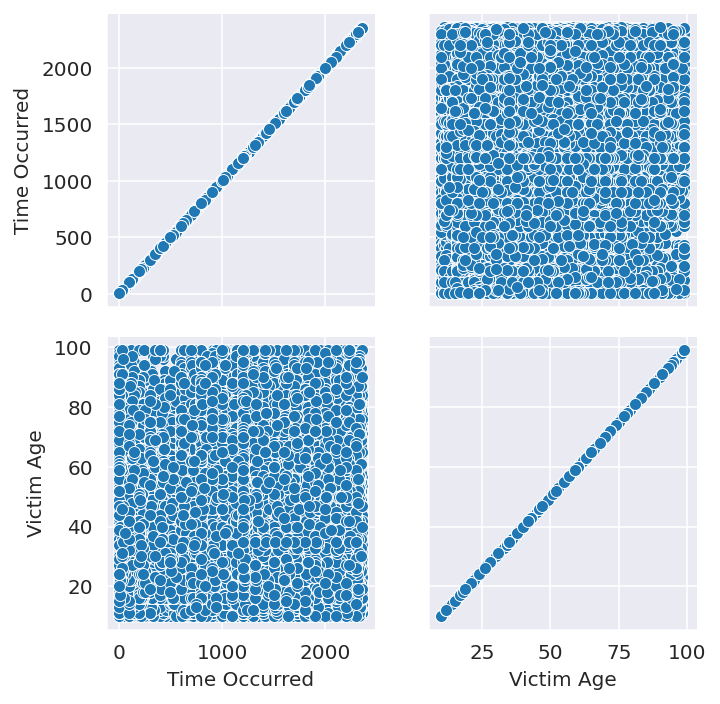

<Figure size 1080x720 with 0 Axes>

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'

g = sns.PairGrid(extracted_df.iloc[:, [2,5]])
plt.figure(figsize=(15,10))
g.map(sns.scatterplot);

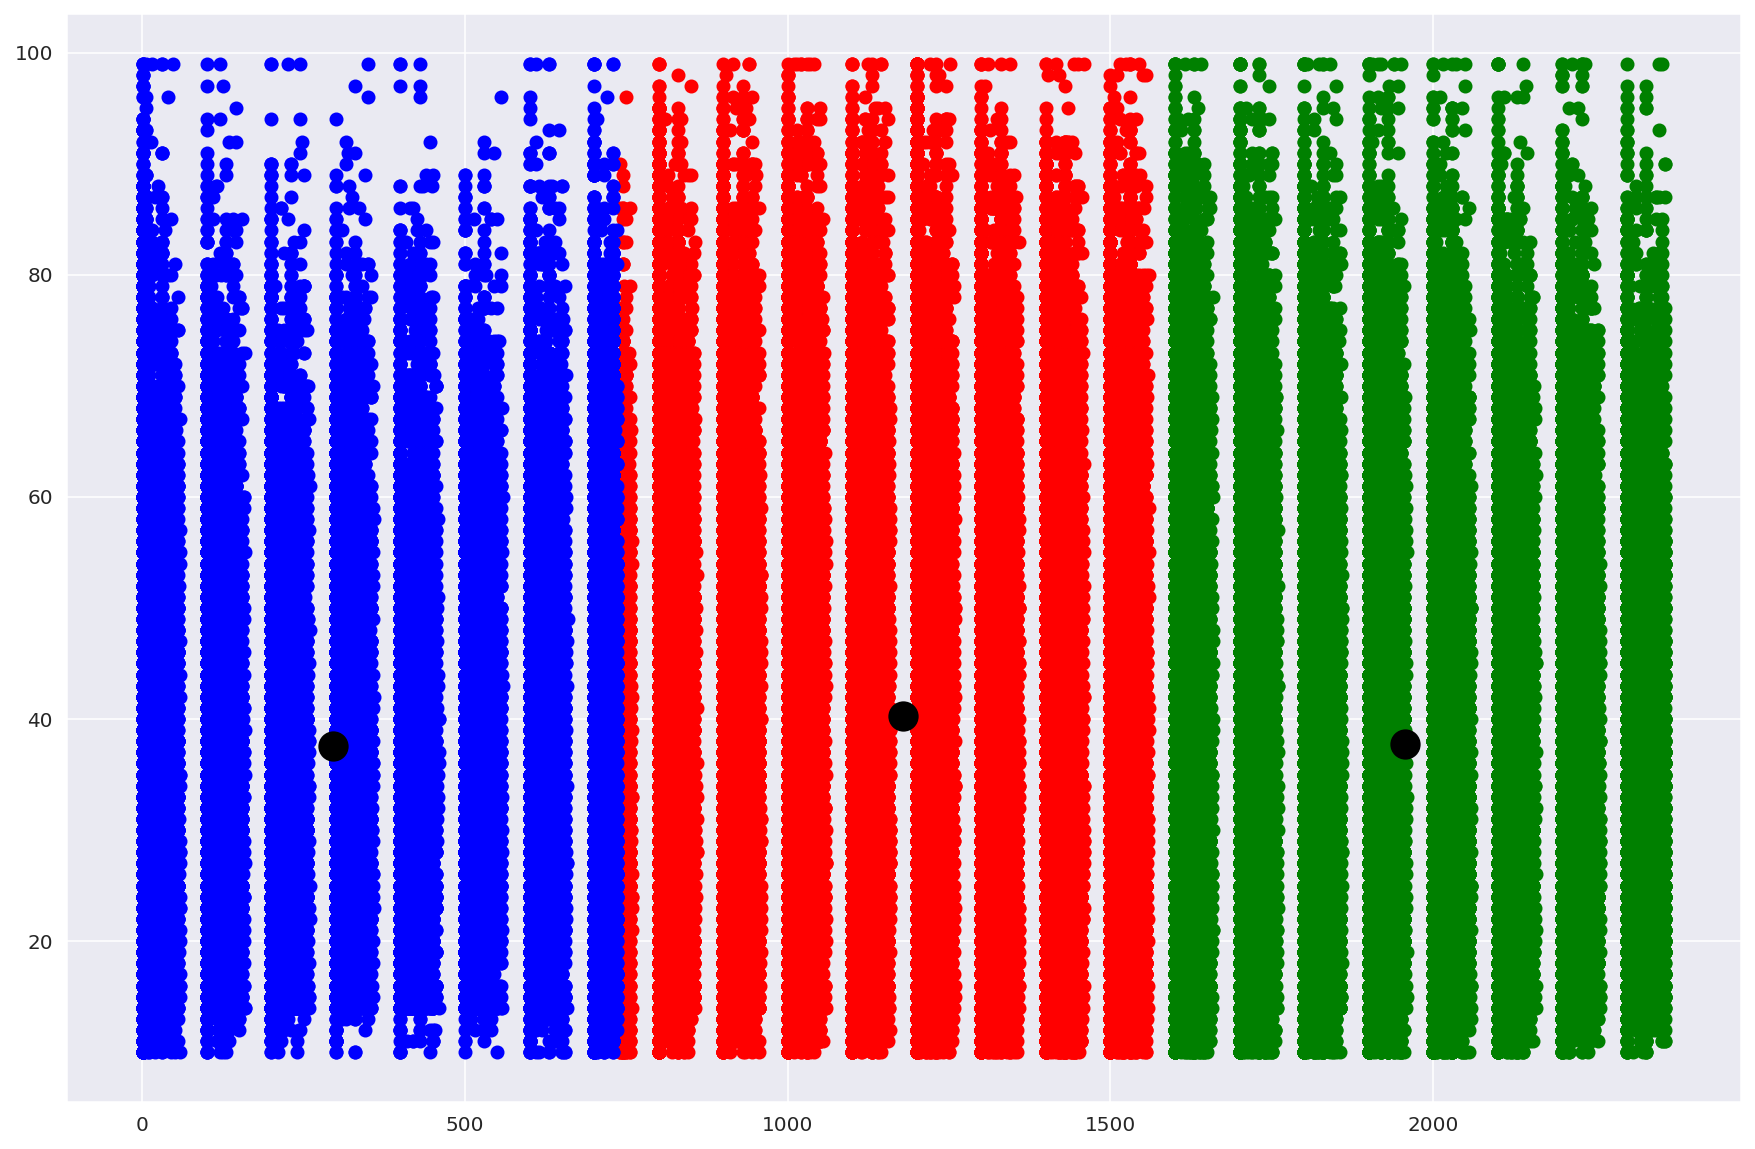

In [ ]:
# Plot the clusters 
plt.figure(figsize=(15,10))

colors = ['red', 'blue', 'green']
plt.scatter(cluster_1_x, cluster_1_y, c=colors[0])                        
plt.scatter(cluster_2_x, cluster_2_y, c=colors[1])                        
plt.scatter(cluster_3_x, cluster_3_y, c=colors[2])                        

# Plot the centroids 
for i in range (3):
  plt.scatter(kmeans.cluster_centers_[i][0], 
              kmeans.cluster_centers_[i][1], 
              s=200,                             # Set centroid size
              c='black')                           # Set centroid color



plt.show()

# reason for the funky plot:

In [ ]:
new_extracted_df = extracted_df[extracted_df['Location '] != '(0, 0)']

new_extracted_df = new_extracted_df.reset_index(drop=True) 

lat = []
lon = []

for i in range(len(new_extracted_df["Location "])):
      loc = new_extracted_df['Location '][i].split(',')
      lat.append(loc[0].replace("(", ""))
      lon.append(loc[1].replace(")", "").strip())

In [ ]:
lat = np.array(lat)
lat = lat.astype(float)

lon = np.array(lon)
lon = lon.astype(float)

In [ ]:
lat

array([34.1628, 34.1541, 34.167 , ..., 34.201 , 34.2029, 34.2258])

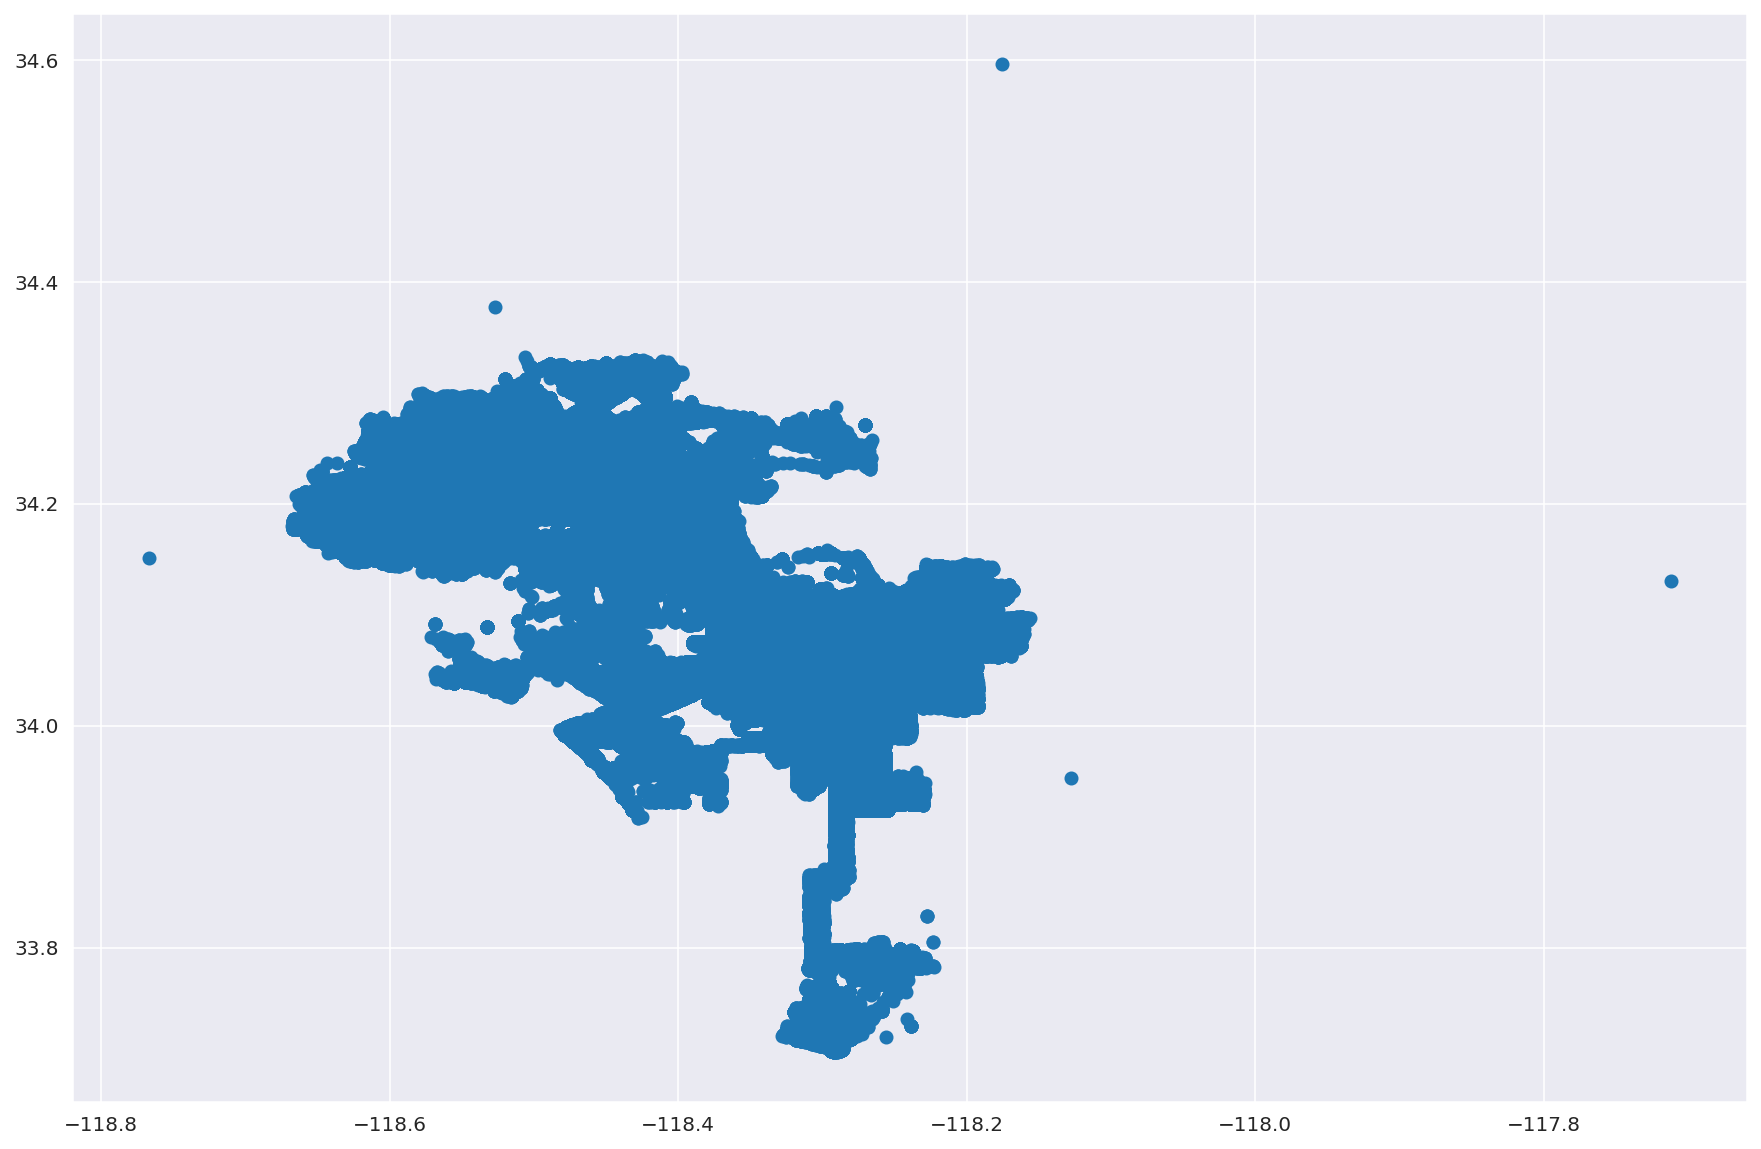

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(lon, lat)                        


plt.show()

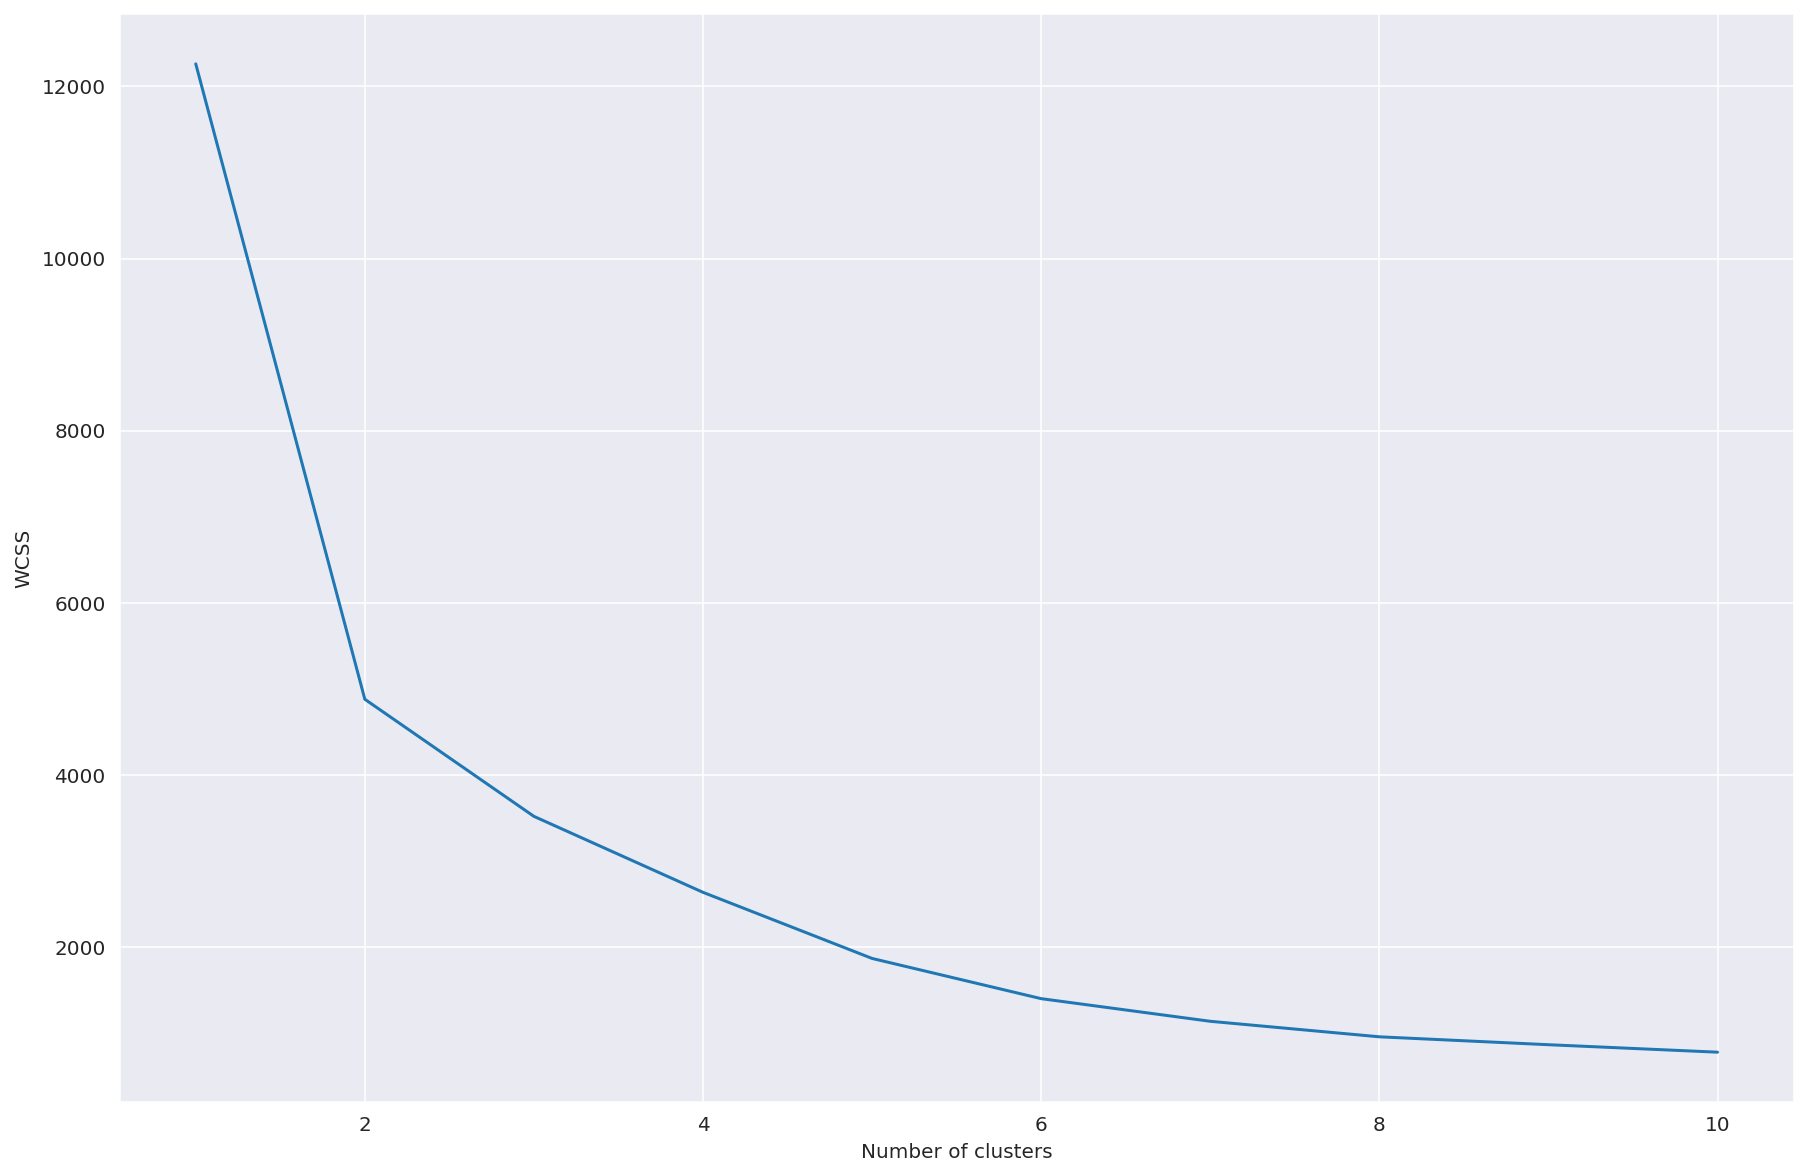

In [ ]:
#only taking 
plt.figure(figsize=(15,10))
X = pd.DataFrame([lon,lat])
X = X.transpose()

# optimal K value for clustering the data
wcss = []

for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

#“init” argument is the method for initializing the centroid. We calculated the WCSS value for each K value. Now we have to plot the WCSS with K value

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:


kmeans = KMeans(n_clusters = 5,                 
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(X)




In [ ]:
cluster_1_x = []
cluster_2_x = []
cluster_3_x = []
cluster_4_x = []
cluster_5_x = []


cluster_1_y = []
cluster_2_y = []
cluster_3_y = []
cluster_4_y = []
cluster_5_y = []


for i in range(len(pred_y)):
  if pred_y[i] == 0:
    cluster_1_x.append(lon[i]) 
    cluster_1_y.append(lat[i])
  if pred_y[i] == 1:
    cluster_2_x.append(lon[i]) 
    cluster_2_y.append(lat[i])
  if pred_y[i] == 2:
    cluster_3_x.append(lon[i]) 
    cluster_3_y.append(lat[i])
  if pred_y[i] == 3:
    cluster_4_x.append(lon[i]) 
    cluster_4_y.append(lat[i])
  if pred_y[i] == 4:
    cluster_5_x.append(lon[i]) 
    cluster_5_y.append(lat[i])


print("done")

done


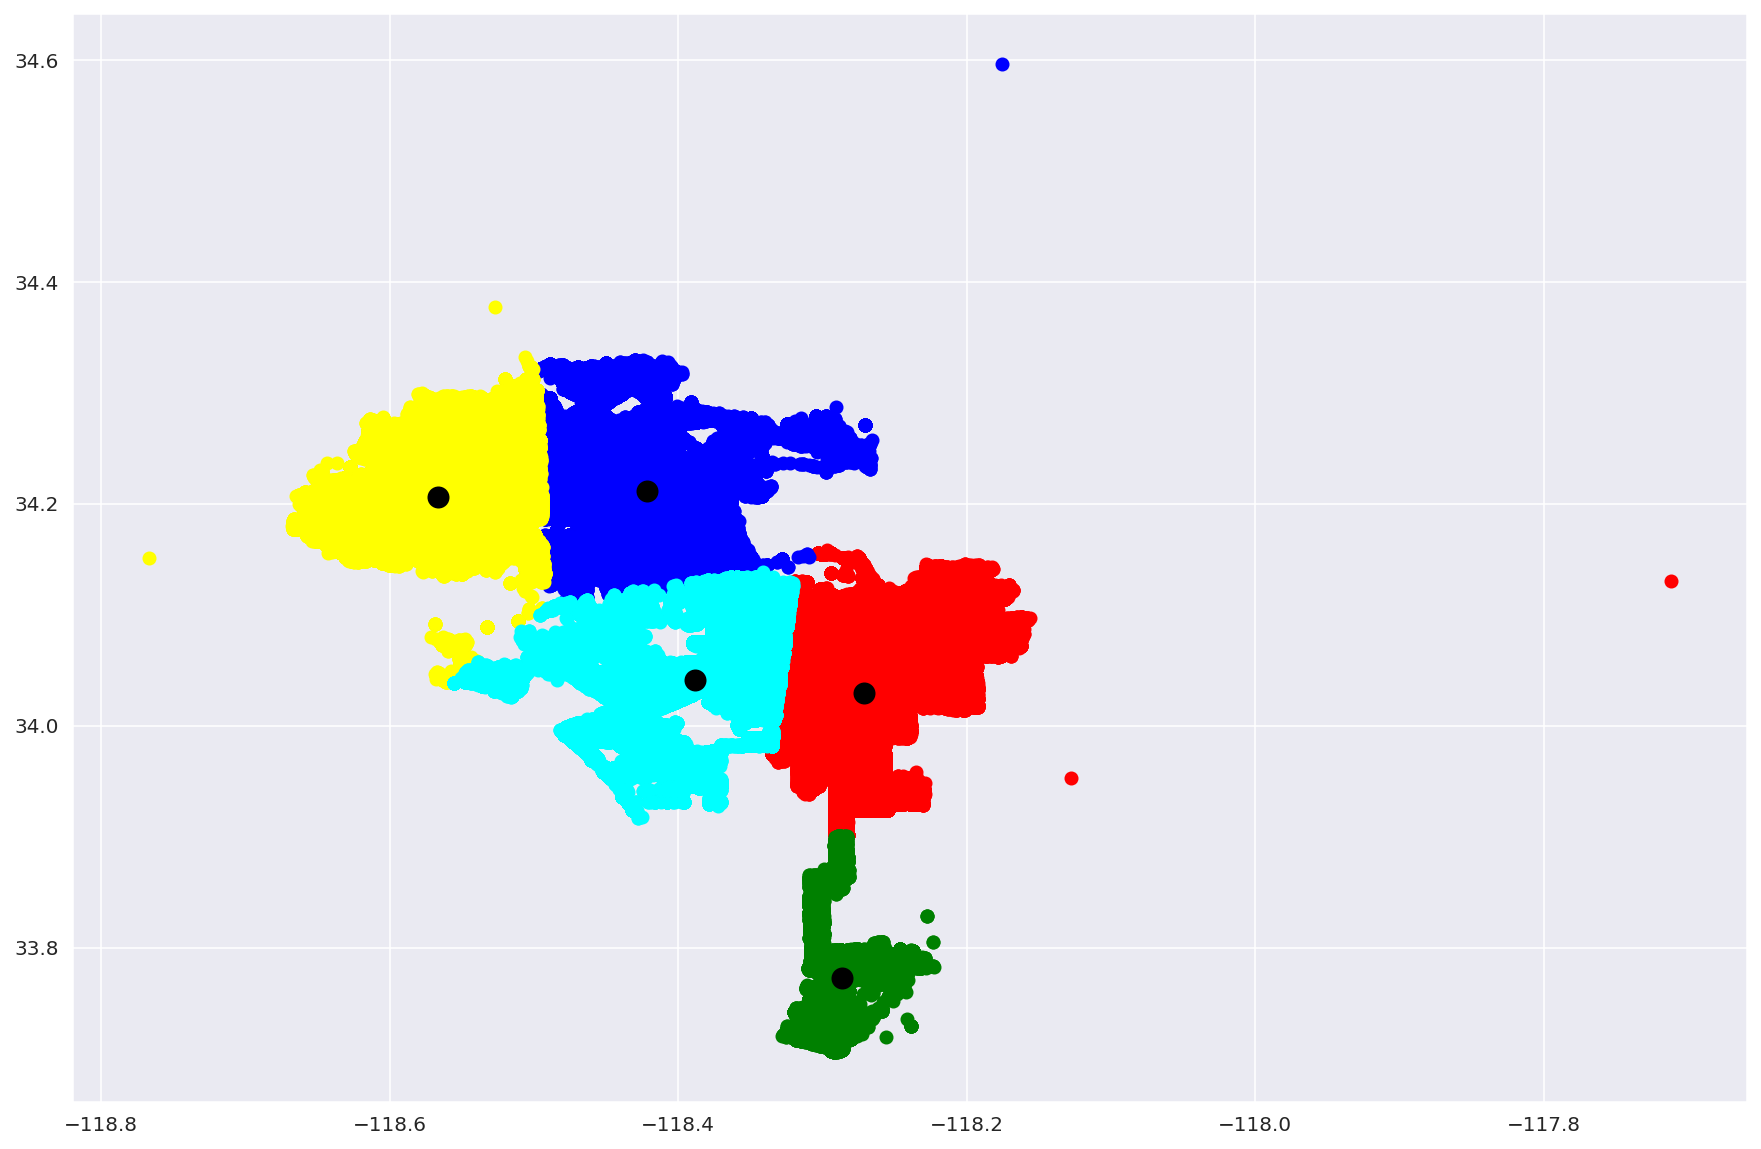

In [ ]:
# Plot the clusters 
plt.figure(figsize=(15,10))
colors = ['red', 'blue', 'green', 'yellow', 'cyan']
plt.scatter(cluster_1_x, cluster_1_y, c=colors[0])                        
plt.scatter(cluster_2_x, cluster_2_y, c=colors[1])                        
plt.scatter(cluster_3_x, cluster_3_y, c=colors[2])
plt.scatter(cluster_4_x, cluster_4_y, c=colors[3])                        
plt.scatter(cluster_5_x, cluster_5_y, c=colors[4])                         

# Plot the centroids 
for i in range (5):
  plt.scatter(kmeans.cluster_centers_[i][0], 
              kmeans.cluster_centers_[i, 1], 
              s=100,                             # Set centroid size
              c='black')                           # Set centroid color



plt.show()

# 3d Clustering

In [ ]:
!pip install kmodes
from kmodes.kmodes import KModes

In [ ]:
# Clustering based on age, gender and area
km_df = new_extracted_df[['Victim Age','Victim Sex','Area Name']]
bins= [0,2,4,13,20,60,110]
labels = ['Infant','Toddler','Kid','Teen','Adult','Elderly']
km_df['Victim Age'] = pd.cut(km_df['Victim Age'], bins=bins, labels=labels, right=False)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 807374.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7894, cost: 749332.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6439, cost: 536536.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2675, cost: 526733.0


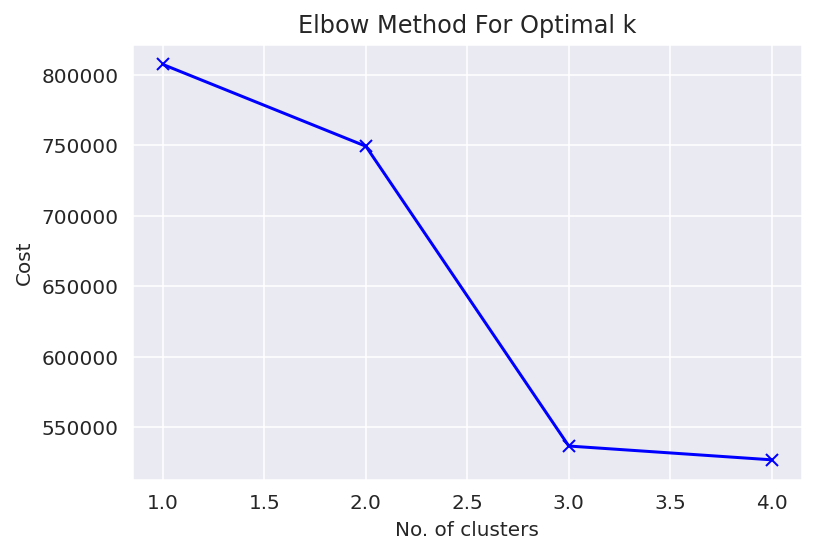

In [ ]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 1, verbose=1)
    kmode.fit_predict(km_df)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Using k = 3
kmode = KModes(n_clusters=3, init = "random", n_init = 1, verbose=1)
clusters = kmode.fit_predict(km_df)
clusters
km_df['clusters'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 40468, cost: 545242.0


In [ ]:
# Value counts of cluster 0
km_df[(km_df['clusters']==0)].value_counts()
# Cluster 0 shows that the first five areas shown below are dangerous for male adults

Victim Age  Victim Sex  Area Name    clusters
Adult       F           77th Street  0           15308
                        Southwest    0           13799
            M           Central      0           12591
            F           Southeast    0           12177
                        N Hollywood  0           10193
                                                 ...  
Elderly     H           Pacific      0               1
Adult       X           West Valley  0               1
            H           Newton       0               1
                        Van Nuys     0               1
            X           Southeast    0               1
Length: 131, dtype: int64

In [ ]:
# Value counts of cluster 1
km_df[(km_df['clusters']==1)].value_counts()
# Cluster 2 shows that the first five areas shown below are dangerous for female adults

Victim Age  Victim Sex  Area Name    clusters
Adult       M           N Hollywood  1           10911
Teen        M           N Hollywood  1            3246
                        77th Street  1            2105
Elderly     M           Devonshire   1            1938
                        West LA      1            1924
                                                 ...  
Teen        X           West Valley  1               4
                        Foothill     1               2
                        Devonshire   1               2
                        Van Nuys     1               1
                        Topanga      1               1
Length: 81, dtype: int64

In [ ]:
# Value counts of cluster 2
km_df[(km_df['clusters']==2)].value_counts()
# Cluster 2 shows that N Hollywood is a dangerous area for females since females regardless of age have been a victim of crime in this area

Victim Age  Victim Sex  Area Name    clusters
Adult       M           Topanga      2           12372
                        Southwest    2           11940
                        77th Street  2           11330
                        Hollywood    2           10957
                        Pacific      2           10449
                        Van Nuys     2            9558
                        Mission      2            9301
                        Olympic      2            9291
                        Northeast    2            9291
                        Rampart      2            8837
                        Newton       2            8347
                        West LA      2            8304
                        Devonshire   2            8248
                        Southeast    2            8053
                        Wilshire     2            8036
                        West Valley  2            7985
                        Harbor       2            7146
                   

In [ ]:
# Clustering based on gender, weapon and area
km_df2 = extracted_df[['Weapon Description','Victim Sex','Area Name']]
km_df2

Weapon Description Victim Sex Area Name
0                                                 none          M   Topanga
1                                                 none          M   Topanga
2                                              VEHICLE          M   Topanga
3       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)          M   Topanga
4                                                 none          M   Topanga
...                                                ...        ...       ...
497838                                            none          F   Topanga
497839                                            none          M   Topanga
497840                                            none          M   Topanga
497841                                            none          M   Topanga
497842  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)          F   Topanga

[497843 rows x 3 columns]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 896541.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 35569, cost: 653683.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 237243, cost: 603110.0
Run 1, iteration: 2/100, moves: 45323, cost: 603110.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4614, cost: 574366.0


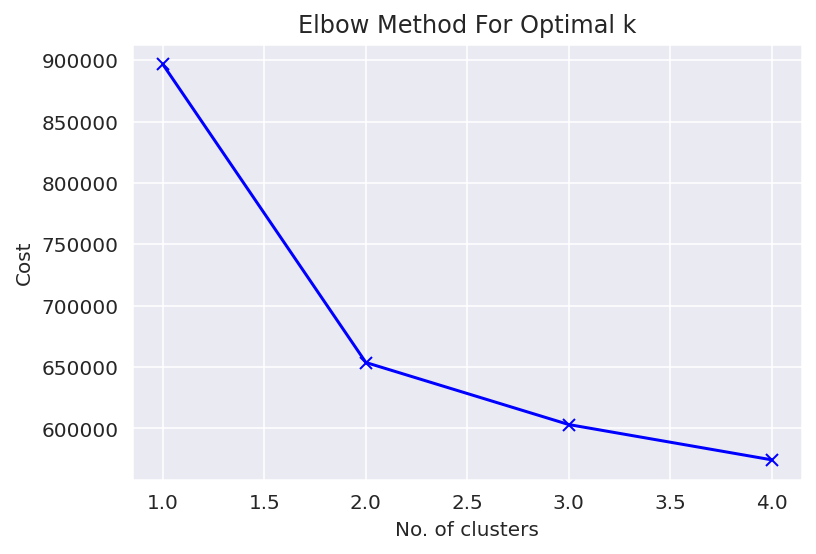

In [ ]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 1, verbose=1)
    kmode.fit_predict(km_df2)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Clustering using k=3
kmode = KModes(n_clusters=3, init = "random", n_init = 1, verbose=1)
clusters = kmode.fit_predict(km_df2)
clusters
km_df2['clusters'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3552, cost: 711442.0


In [ ]:
# Value counts of cluster 0
km_df2[(km_df2['clusters']==0)].value_counts()


Weapon Description                    Victim Sex  Area Name    clusters
none                                  M           N Hollywood  0           12193
                                                  Topanga      0           11952
                                                  Southwest    0            9349
                                      F           Southwest    0            9256
                                      M           Pacific      0            9219
                                                                           ...  
MACE/PEPPER SPRAY                     X           Rampart      0               1
STARTER PISTOL/REVOLVER               M           Newton       0               1
UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE  M           Van Nuys     0               1
                                                  Pacific      0               1
DEMAND NOTE                           M           Wilshire     0               1
Length: 1418, dtype: int64

In [ ]:
# Value counts of cluster 1
km_df2[(km_df2['clusters']==1)].value_counts()

Weapon Description                              Victim Sex  Area Name    clusters
none                                            F           Northeast    1           7409
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  F           77th Street  1           7035
                                                            Southeast    1           5883
                                                            Southwest    1           5624
                                                            Newton       1           4205
                                                                                     ... 
OTHER FIREARM                                   F           Foothill     1              1
SWITCH BLADE                                    F           Northeast    1              1
OTHER CUTTING INSTRUMENT                        F           West Valley  1              1
                                                            Topanga      1              1
SWITCH BLADE      

In [ ]:
# Value counts of cluster 2
km_df2[(km_df2['clusters']==2)].value_counts()

Weapon Description                              Victim Sex  Area Name  clusters
none                                            M           Harbor     2           6814
                                                F           Harbor     2           6077
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  M           Harbor     2           1648
none                                            X           Harbor     2            516
HAND GUN                                        M           Harbor     2            292
                                                                                   ... 
SYRINGE                                         M           Harbor     2              1
MACE/PEPPER SPRAY                               X           Harbor     2              1
LIQUOR/DRUGS                                    M           Harbor     2              1
SEMI-AUTOMATIC RIFLE                            M           Harbor     2              1
CLEAVER                                 

<Figure size 1080x720 with 0 Axes>

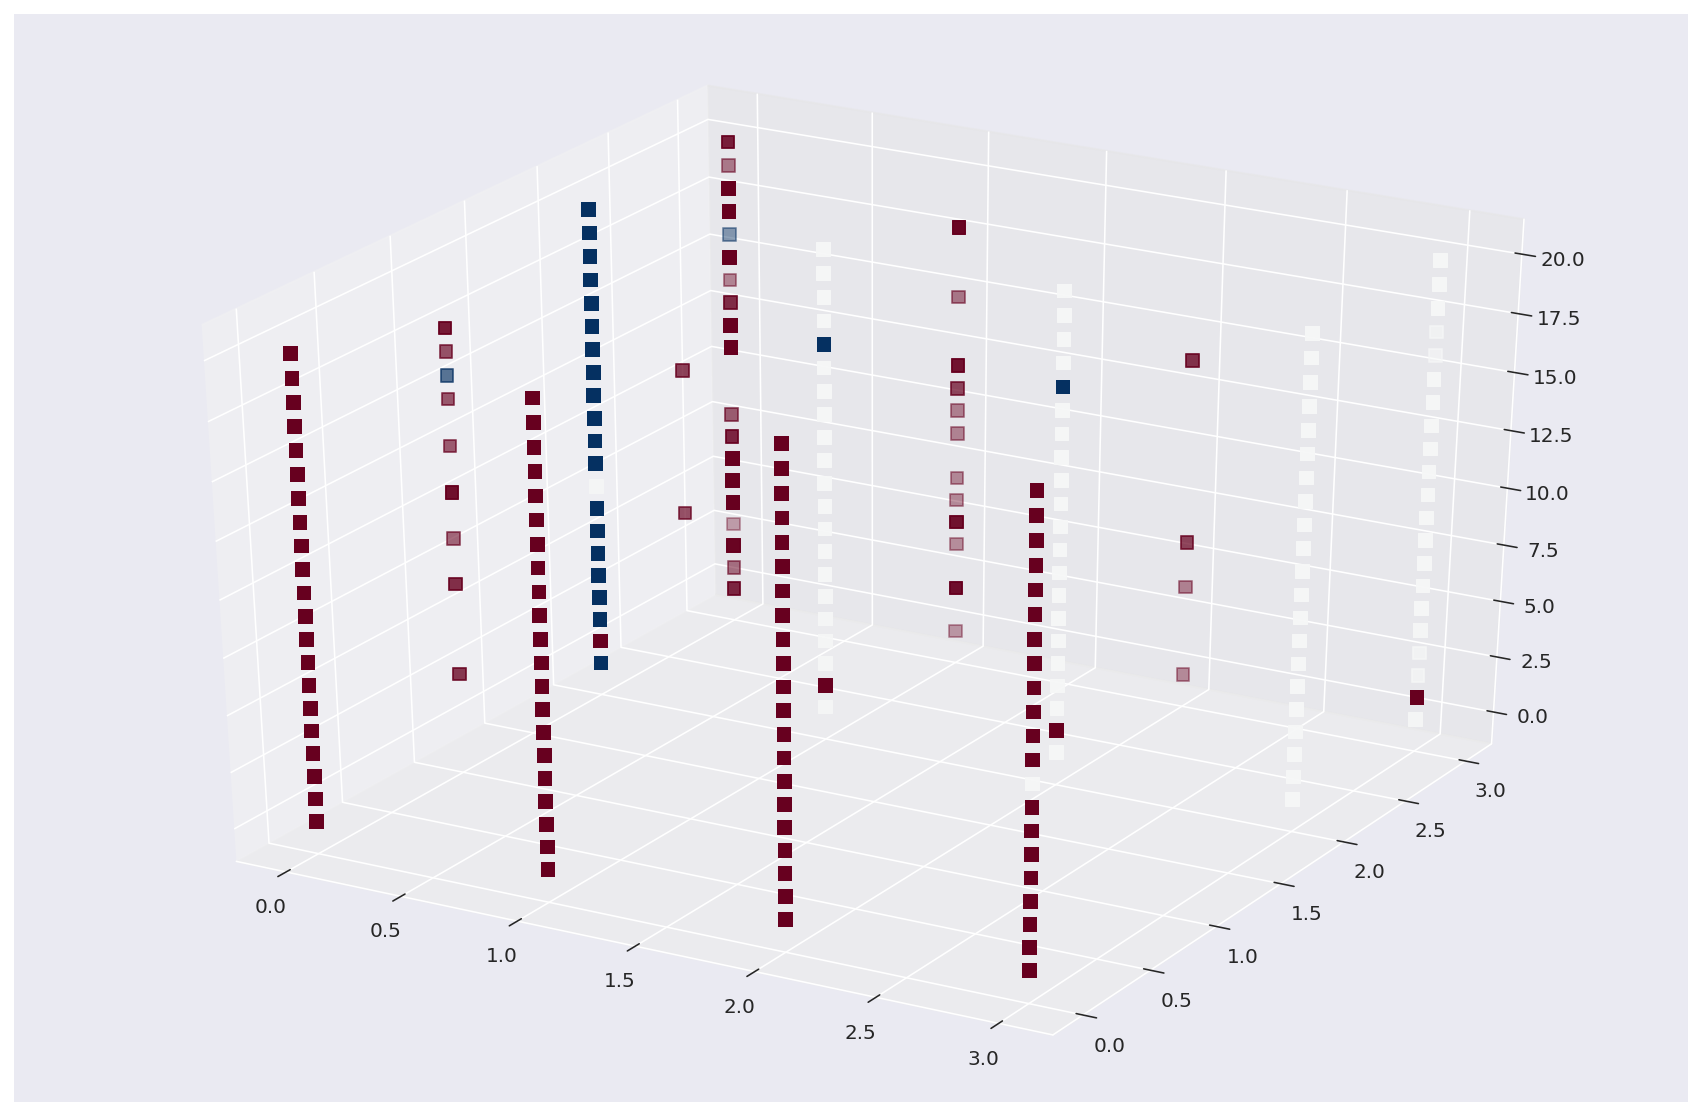

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
encoded_df = km_df.apply(le.fit_transform)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(encoded_df['Victim Age'])
y = np.array(encoded_df['Victim Sex'])
z = np.array(encoded_df['Area Name'])

ax.scatter(x,y,z, marker="s", c=encoded_df["clusters"], s=40, cmap="RdBu")

plt.show()


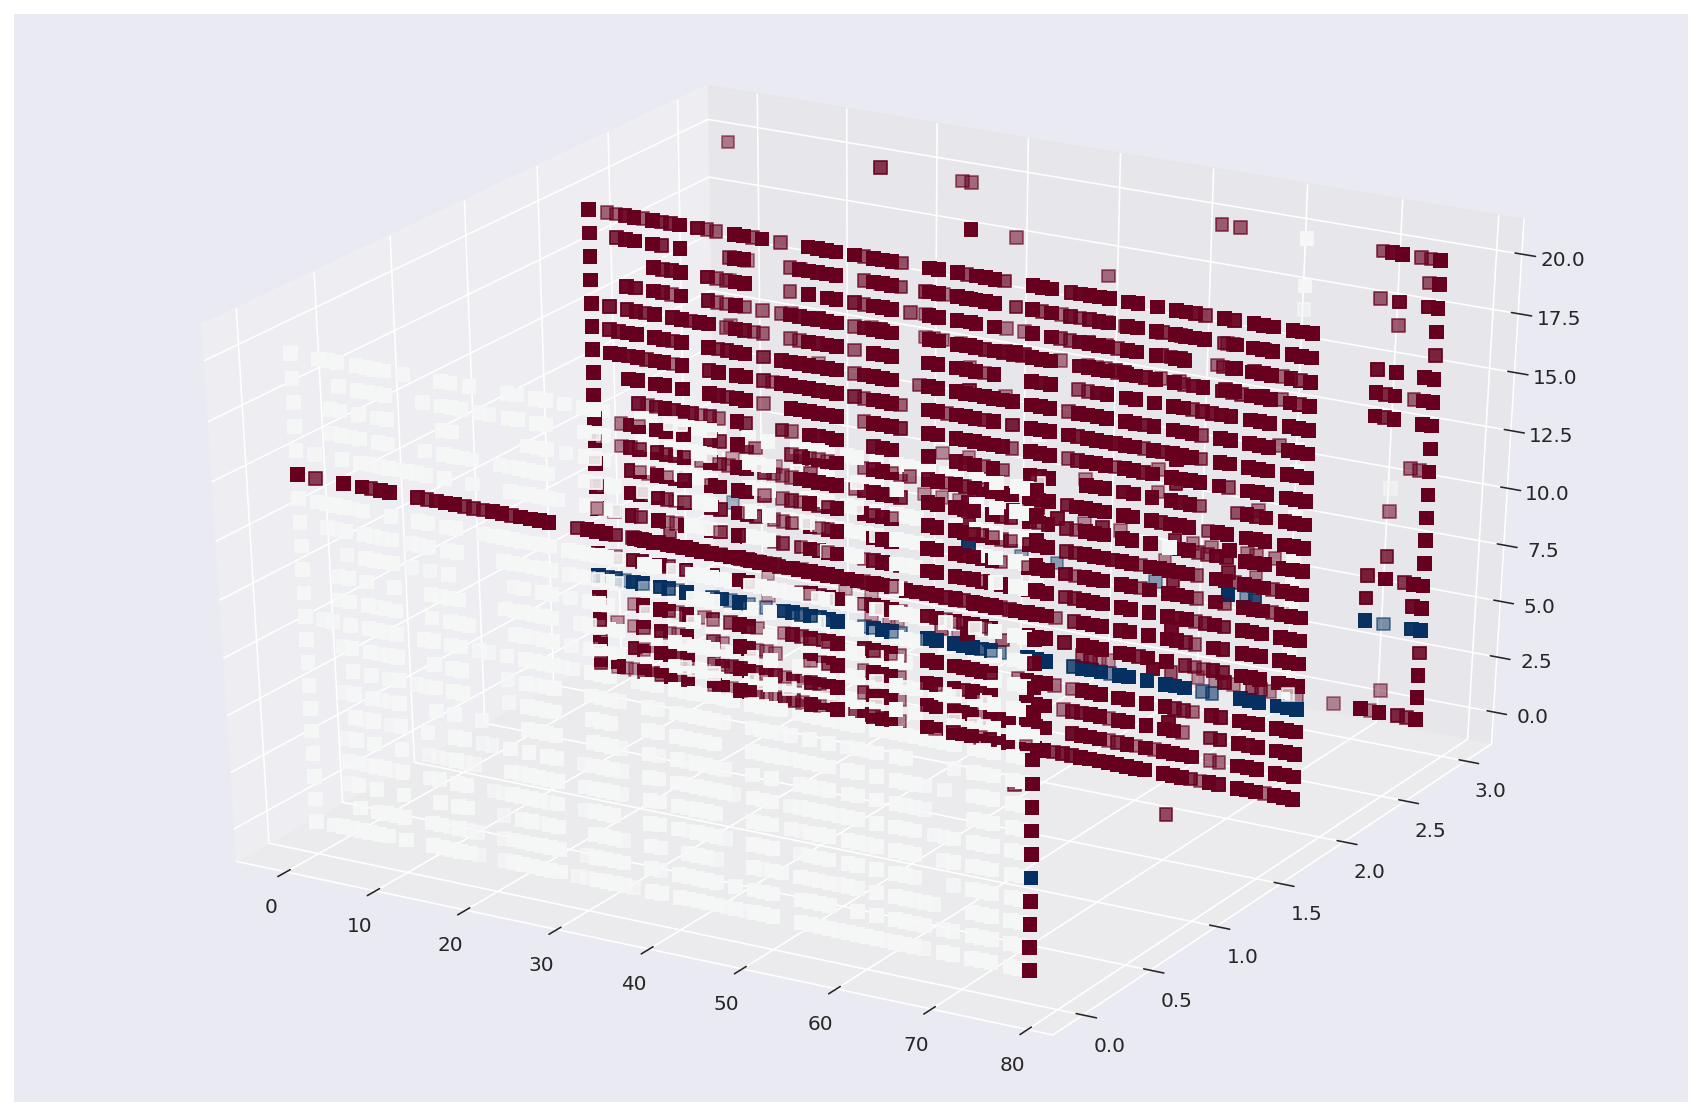

In [ ]:
le = preprocessing.LabelEncoder()
encoded_df = km_df2.apply(le.fit_transform)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(encoded_df['Weapon Description'])
y = np.array(encoded_df['Victim Sex'])
z = np.array(encoded_df['Area Name'])

ax.scatter(x,y,z, marker="s", c=encoded_df["clusters"], s=40, cmap="RdBu")

plt.show()